In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import xgboost as xgb

from tqdm import tqdm

from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_absolute_percentage_error,
)


In [2]:
df = pd.read_csv("../data/MarketPricePT.csv", parse_dates=["date"])
df.head()


,date,price
0,2008-07-01 01:00:00,70.31
1,2008-07-01 02:00:00,64.54
2,2008-07-01 03:00:00,64.08
3,2008-07-01 04:00:00,63.50
4,2008-07-01 05:00:00,63.28


In [3]:
energy_df = pd.read_csv("../data/BANES_v4_featureimportance.csv")
energy_df.head()

,location,time,energy,energy_lag_1,energy_lag_46,energy_lag_328,energy_lag_334,energy_lag_335,energy_lag_336
0,##Bishop Sutton Primary School Electricity,2017-01-08 00:00:00+00:00,0.000,0.000,0.000,0.005,0.000,0.000,0.000
1,##Bishop Sutton Primary School Electricity,2017-01-08 00:30:00+00:00,0.000,0.000,0.005,0.005,0.005,0.000,0.000
2,##Bishop Sutton Primary School Electricity,2017-01-08 01:00:00+00:00,0.000,0.000,0.005,0.006,0.005,0.005,0.000
3,##Bishop Sutton Primary School Electricity,2017-01-08 01:30:00+00:00,0.006,0.000,0.006,0.005,0.006,0.005,0.005
4,##Bishop Sutton Primary School Electricity,2017-01-08 02:00:00+00:00,0.005,0.006,0.005,0.005,0.005,0.006,0.005


In [4]:
# pick 10 locations at random
locs = energy_df.sample(10, random_state=1).index.tolist()
locations = energy_df.iloc[locs]["location"]
assert len(locations) == 10 and len(np.unique(locations)) == 10
energy_df = energy_df[energy_df["location"].isin(locations)]
energy_df.head()

,location,time,energy,energy_lag_1,energy_lag_46,energy_lag_328,energy_lag_334,energy_lag_335,energy_lag_336
45650,##Northgate House Electricity Supply 2,2017-01-08 00:00:00+00:00,0.342,0.339,0.332,0.342,0.334,0.335,0.334
45651,##Northgate House Electricity Supply 2,2017-01-08 00:30:00+00:00,0.343,0.342,0.335,0.337,0.333,0.334,0.335
45652,##Northgate House Electricity Supply 2,2017-01-08 01:00:00+00:00,0.342,0.343,0.338,0.336,0.338,0.333,0.334
45653,##Northgate House Electricity Supply 2,2017-01-08 01:30:00+00:00,0.335,0.342,0.341,0.335,0.341,0.338,0.333
45654,##Northgate House Electricity Supply 2,2017-01-08 02:00:00+00:00,0.338,0.335,0.342,0.335,0.345,0.341,0.338


In [5]:
model: xgb.XGBRegressor = pickle.load(open("../models/model_v1.pkl", "rb"))

In [6]:
X = energy_df.drop(["location", "time", "energy"], axis=1)
y = model.predict(X)

In [7]:
energy_df["energy_pred"] = y
energy_df.head()


,location,time,energy,energy_lag_1,energy_lag_46,energy_lag_328,energy_lag_334,energy_lag_335,energy_lag_336,energy_pred
45650,##Northgate House Electricity Supply 2,2017-01-08 00:00:00+00:00,0.342,0.339,0.332,0.342,0.334,0.335,0.334,0.346541
45651,##Northgate House Electricity Supply 2,2017-01-08 00:30:00+00:00,0.343,0.342,0.335,0.337,0.333,0.334,0.335,0.350093
45652,##Northgate House Electricity Supply 2,2017-01-08 01:00:00+00:00,0.342,0.343,0.338,0.336,0.338,0.333,0.334,0.347754
45653,##Northgate House Electricity Supply 2,2017-01-08 01:30:00+00:00,0.335,0.342,0.341,0.335,0.341,0.338,0.333,0.350093
45654,##Northgate House Electricity Supply 2,2017-01-08 02:00:00+00:00,0.338,0.335,0.342,0.335,0.345,0.341,0.338,0.346541


In [8]:
# group by date and sum the energy_pred
energy_df = energy_df.groupby("time").sum()
energy_df.head()

,energy,energy_lag_1,energy_lag_46,energy_lag_328,energy_lag_334,energy_lag_335,energy_lag_336,energy_pred
time,,,,,,,,
2017-01-08 00:00:00+00:00,12.1005,12.4145,15.6905,19.0515,13.7410,13.665,10.4265,12.285041
2017-01-08 00:30:00+00:00,15.5335,12.1005,15.7690,16.3645,14.3410,13.741,13.6650,13.659566
2017-01-08 01:00:00+00:00,15.8120,15.5335,15.9685,15.1790,13.9740,14.341,13.7410,15.108760
2017-01-08 01:30:00+00:00,15.2760,15.8120,15.6965,14.6085,13.7320,13.974,14.3410,15.378116
2017-01-08 02:00:00+00:00,15.6635,15.2760,15.5890,14.2770,13.7605,13.732,13.9740,14.970471


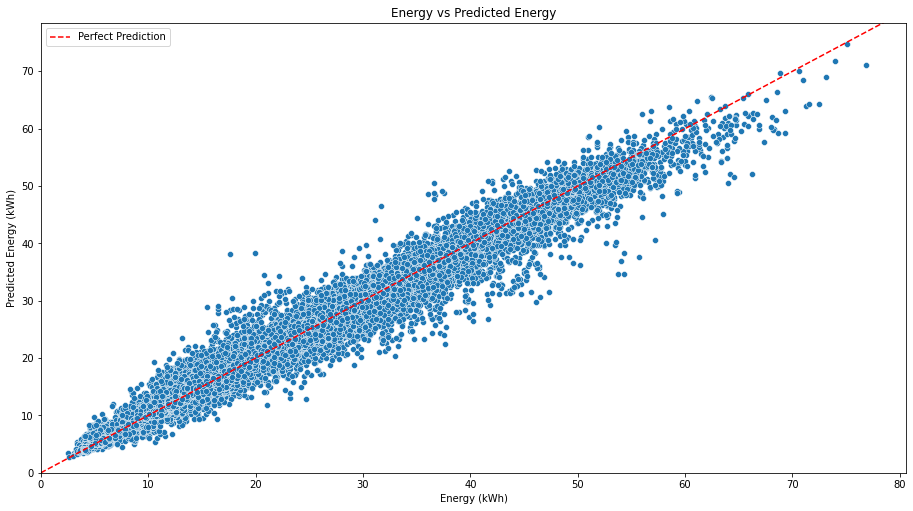

In [9]:
plt.figure(figsize=(12.8, 7.2))

sns.scatterplot(data=energy_df, x="energy", y="energy_pred")
plt.xlabel("Energy (kWh)")
plt.ylabel("Predicted Energy (kWh)")
plt.title("Energy vs Predicted Energy")
plt.xlim(0, None)
plt.ylim(0, None)
plt.plot([0, 100], [0, 100], "r--")
plt.legend(["Perfect Prediction"])
plt.tight_layout()
plt.show()

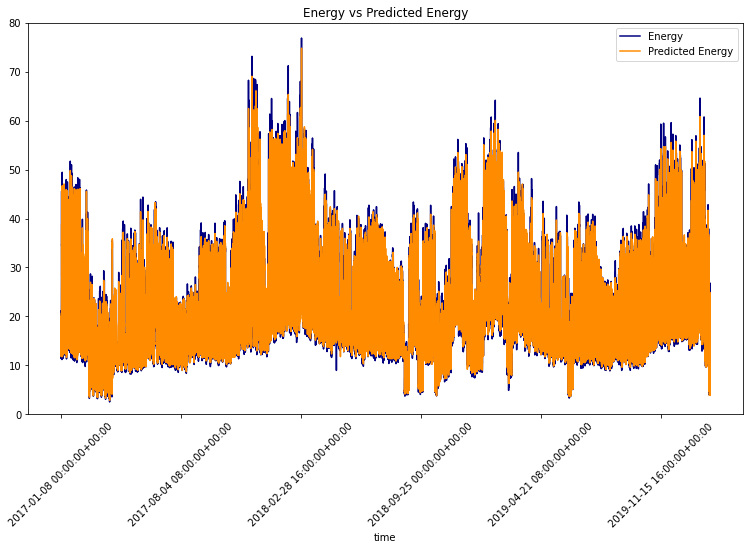

In [10]:
ax = energy_df.plot(y="energy", figsize=(12.8, 7.2), label="Energy", color="navy")
energy_df.plot(y="energy_pred", figsize=(12.8, 7.2), label="Predicted Energy", color="darkorange", ax=ax)
plt.ylim(0, 80)
plt.xticks(rotation=45)
plt.ylim(0, 80)
plt.xticks(rotation=45)
plt.title("Energy vs Predicted Energy")
plt.show()


In [11]:
mae = mean_absolute_error(energy_df["energy"], energy_df["energy_pred"])
mse = mean_squared_error(energy_df["energy"], energy_df["energy_pred"])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(energy_df["energy"], energy_df["energy_pred"])
wmape = np.sum(np.abs(energy_df["energy_pred"] - energy_df["energy"])) / np.sum(np.abs(energy_df["energy"]))
r2 = r2_score(energy_df["energy"], energy_df["energy_pred"])

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"WMAPE: {wmape}")
print(f"R2: {r2}")

MAE: 1.181869253403018
MSE: 3.192910767751453
RMSE: 1.7868717826837641
MAPE: 0.061066897782907144
WMAPE: 0.05825575517174421
R2: 0.9699861048549361


### Energy Production

The production of energy of a solar panel is given by the following equation:

$E(t) = A*r(t)*G(t)*\rho$

Where:

* $E(t)$ is the energy produced in time $t$;
* $A$ is the area of the solar panel;
* $r(t)$ is the is the yield of the solar panel in time $t$;
* $G(t)$ is the Solar irradiance at time $t$;
* $\rho$ is the performance of the solar panel.

In [12]:
simulation = energy_df[["energy", "energy_pred"]]
simulation.head()


,energy,energy_pred
time,,
2017-01-08 00:00:00+00:00,12.1005,12.285041
2017-01-08 00:30:00+00:00,15.5335,13.659566
2017-01-08 01:00:00+00:00,15.8120,15.108760
2017-01-08 01:30:00+00:00,15.2760,15.378116
2017-01-08 02:00:00+00:00,15.6635,14.970471


In [13]:
solar_df = pd.read_csv("../data/Solcast_PT30M.csv")
solar_df["PeriodStart"] = pd.to_datetime(solar_df["PeriodStart"], format="%Y-%m-%d %H:%M:%S", utc=True)
solar_df["PeriodEnd"] = pd.to_datetime(solar_df["PeriodEnd"], format="%Y-%m-%d %H:%M:%S", utc=True)
simulation.reset_index(inplace=True)
simulation["time"] = pd.to_datetime(simulation["time"], format="%Y-%m-%d %H:%M:%S", utc=True)
solar_df.rename(columns={"PeriodEnd": "time"}, inplace=True)
simulation = simulation.merge(solar_df, on="time", how="left")
simulation.set_index("time", inplace=True)
simulation = simulation[["energy", "energy_pred", "Dni"]]
simulation.head()

,energy,energy_pred,Dni
time,,,
2017-01-08 00:00:00+00:00,12.1005,12.285041,0
2017-01-08 00:30:00+00:00,15.5335,13.659566,0
2017-01-08 01:00:00+00:00,15.8120,15.108760,0
2017-01-08 01:30:00+00:00,15.2760,15.378116,0
2017-01-08 02:00:00+00:00,15.6635,14.970471,0


In [14]:
simulation["Dni"] = simulation["Dni"] / 1000
simulation.describe()

,energy,energy_pred,Dni
count,54049.000000,54049.000000,54049.000000
mean,20.287596,20.307133,0.098700
std,10.314216,10.019979,0.221135
min,2.506500,2.833241,0.000000
25%,12.825000,12.962095,0.000000
50%,17.028000,17.352509,0.000000
75%,25.407000,25.373648,0.017000
max,76.893000,74.821167,0.945000


In [15]:
PRODUCTION = 10 * 18 * 1.6 * 0.15

In [16]:
simulation["production"] = PRODUCTION * simulation["Dni"]
simulation.head()

,energy,energy_pred,Dni,production
time,,,,
2017-01-08 00:00:00+00:00,12.1005,12.285041,0.0,0.0
2017-01-08 00:30:00+00:00,15.5335,13.659566,0.0,0.0
2017-01-08 01:00:00+00:00,15.8120,15.108760,0.0,0.0
2017-01-08 01:30:00+00:00,15.2760,15.378116,0.0,0.0
2017-01-08 02:00:00+00:00,15.6635,14.970471,0.0,0.0


In [17]:
simulation = simulation[["energy", "energy_pred", "production"]]
simulation.describe()

,energy,energy_pred,production
count,54049.000000,54049.000000,54049.000000
mean,20.287596,20.307133,4.263826
std,10.314216,10.019979,9.553029
min,2.506500,2.833241,0.000000
25%,12.825000,12.962095,0.000000
50%,17.028000,17.352509,0.000000
75%,25.407000,25.373648,0.734400
max,76.893000,74.821167,40.824000


In [18]:
efficiency = 0.985
BATTERY_CAP = 16

In [19]:
def baseline(x: pd.array, state_of_charge: float) -> tuple[pd.array, float]:
    x["battery_charge"] = state_of_charge
    # energy predicted to consume
    to_consume = x["energy"]

    # if the energy predicted to consume is greater than the energy produced
    if x["production"] < x["energy"]:
        # consume the energy produced
        to_consume -= x["production"]
        x["consumed_from_production"] = x["production"]

        # go fetch the rest to the battery
        if to_consume > x["battery_charge"] * efficiency:
            # if the battery energy is not enough 
            # consume all the energy from the battery
            to_consume -= x["battery_charge"] * efficiency
            x["consumed_from_battery"] = x["battery_charge"] * efficiency
            # add loss from the battery
            x["losses"] = x["battery_charge"] * (1 - efficiency)
            x["battery_charge"] = 0
        else:
            # if the battery energy is enough
            x["battery_charge"] -= to_consume + to_consume * (1 - efficiency)
            x["consumed_from_battery"] = to_consume
            # add loss from the battery
            x["losses"] = to_consume * (1 - efficiency)
            to_consume = 0
    else:
        # if the energy predicted to consume is less than the energy produced
        # consume the energy predicted to consume
        x["consumed_from_production"] = to_consume
        to_consume = 0

        # empty space in the battery
        possible_charge = BATTERY_CAP - x["battery_charge"]
        # add the produced energy to the battery
        x["battery_charge"] += min((x["production"] - x["energy"]) * efficiency, possible_charge)
        # log the energy saved in the battery
        x["saved_to_battery"] += min((x["production"] - x["energy"]) * efficiency, possible_charge)
        x["losses"] += x["saved_to_battery"] * (1 - efficiency) / efficiency
        # send the rest of the energy to the grid
        x["send_to_grid"] = x["production"] - x["saved_to_battery"] - x["losses"]
    
    # fetch the rest of the energy to the grid
    x["grid_energy"] += to_consume
    state_of_charge = x["battery_charge"]
    return x, state_of_charge


In [20]:
state_of_charge = 0

# initiate columns to zero
simulation["battery_charge"] = 0
simulation["consumed_from_production"] = 0
simulation["consumed_from_battery"] = 0
simulation["saved_to_battery"] = 0
simulation["losses"] = 0
simulation["send_to_grid"] = 0
simulation["grid_energy"] = 0

for i in tqdm(range(len(simulation))):
    simulation.iloc[i], state_of_charge = baseline(simulation.iloc[i], state_of_charge)

100%|██████████| 54049/54049 [03:24<00:00, 264.32it/s]


In [21]:
prices = pd.read_csv("../data/MarketPricePT.csv")
prices.columns = ["time", "price"]
prices.time = pd.to_datetime(prices.time, utc=True)

simulation["grid_price"] = simulation.merge(prices, on="time", how="left").interpolate(method="pad")["price"] * simulation["grid_energy"] / 1000
simulation.head()

,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price
time,,,,,,,,,,,
2017-01-08 00:00:00+00:00,12.1005,12.285041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.1005,NaN
2017-01-08 00:30:00+00:00,15.5335,13.659566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5335,NaN
2017-01-08 01:00:00+00:00,15.8120,15.108760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.8120,NaN
2017-01-08 01:30:00+00:00,15.2760,15.378116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.2760,NaN
2017-01-08 02:00:00+00:00,15.6635,14.970471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.6635,NaN


In [22]:
simulation.describe()

,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price
count,54049.000000,54049.000000,54049.000000,54049.000000,54049.000000,54049.000000,54049.000000,54049.000000,54049.000000,54049.000000,0.0
mean,20.287596,20.307133,4.263826,1.293555,3.396496,0.154067,0.156393,0.004707,2.357510,16.737033,NaN
std,10.314216,10.019979,9.553029,4.137527,7.572451,1.073487,1.035676,0.022363,7.990947,11.083715,NaN
min,2.506500,2.833241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,12.825000,12.962095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.041000,NaN
50%,17.028000,17.352509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.843500,NaN
75%,25.407000,25.373648,0.734400,0.000000,0.734400,0.000000,0.000000,0.000000,0.000000,21.710000,NaN
max,76.893000,74.821167,40.824000,16.000000,39.182400,15.760000,16.000000,0.243655,40.824000,76.893000,NaN


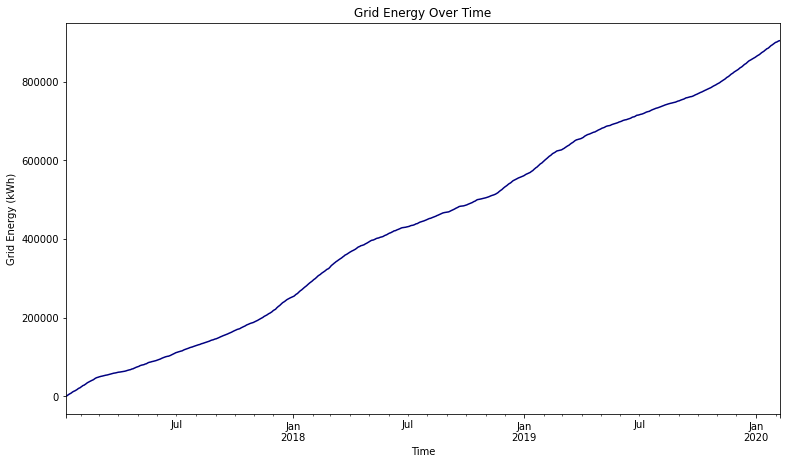

In [23]:
simulation["grid_energy"].cumsum().plot(figsize=(12.8, 7.2), c="navy")
plt.xlabel("Time")
plt.ylabel("Grid Energy (kWh)")
plt.title("Grid Energy Over Time")
plt.show()

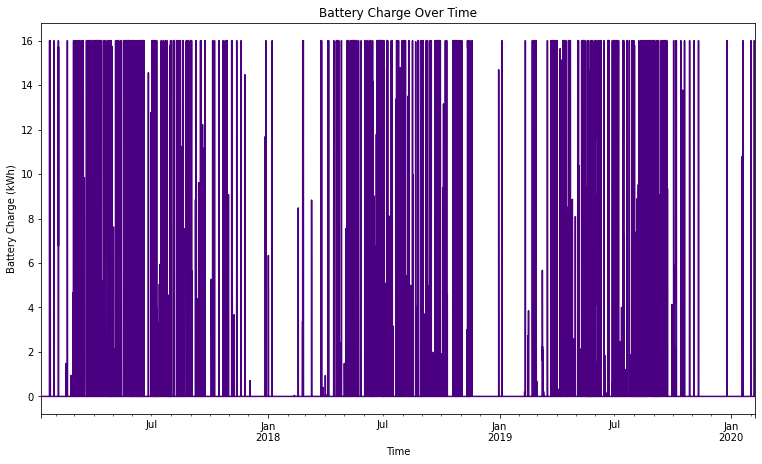

In [24]:
simulation["battery_charge"].plot(figsize=(12.8, 7.2), c="indigo")
plt.xlabel("Time")
plt.ylabel("Battery Charge (kWh)")
plt.title("Battery Charge Over Time")
plt.show()

In [25]:
prices = pd.read_csv("../data/MarketPricePT.csv")
prices.columns = ["time", "price"]
prices.time = pd.to_datetime(prices.time, utc=True)

simulation["grid_price"] = simulation.merge(prices, on="time", how="left").interpolate(method="pad")["price"] * simulation["grid_energy"] / 1000
simulation.head()

,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price
time,,,,,,,,,,,
2017-01-08 00:00:00+00:00,12.1005,12.285041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.1005,NaN
2017-01-08 00:30:00+00:00,15.5335,13.659566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5335,NaN
2017-01-08 01:00:00+00:00,15.8120,15.108760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.8120,NaN
2017-01-08 01:30:00+00:00,15.2760,15.378116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.2760,NaN
2017-01-08 02:00:00+00:00,15.6635,14.970471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.6635,NaN


In [26]:
simulation.sum()

energy                      1.096524e+06
energy_pred                 1.097580e+06
production                  2.304555e+05
battery_charge              6.991535e+04
consumed_from_production    1.835772e+05
consumed_from_battery       8.327182e+03
saved_to_battery            8.452859e+03
losses                      2.544005e+02
send_to_grid                1.274210e+05
grid_energy                 9.046199e+05
grid_price                  0.000000e+00
dtype: float64

...More graphs

## Simulation 2

Add literature algorithm to the simulation.

In [27]:
energy_df.drop("energy_pred", axis=1, inplace=True)

In [28]:
energy_df["time"] = pd.to_datetime(energy_df.index)

# select rows at midnight
X = energy_df.loc[(energy_df["time"].dt.hour == 0) & (energy_df["time"].dt.minute == 0)]
X = X.drop(["time", "energy"], axis=1)

energy_df.loc[(energy_df["time"].dt.hour == 0) & (energy_df["time"].dt.minute == 0), "energy_pred"] = model.predict(X)
energy_df.drop(columns=["time"], inplace=True)
energy_df.head()


,energy,energy_lag_1,energy_lag_46,energy_lag_328,energy_lag_334,energy_lag_335,energy_lag_336,energy_pred
time,,,,,,,,
2017-01-08 00:00:00+00:00,12.1005,12.4145,15.6905,19.0515,13.7410,13.665,10.4265,13.066371
2017-01-08 00:30:00+00:00,15.5335,12.1005,15.7690,16.3645,14.3410,13.741,13.6650,NaN
2017-01-08 01:00:00+00:00,15.8120,15.5335,15.9685,15.1790,13.9740,14.341,13.7410,NaN
2017-01-08 01:30:00+00:00,15.2760,15.8120,15.6965,14.6085,13.7320,13.974,14.3410,NaN
2017-01-08 02:00:00+00:00,15.6635,15.2760,15.5890,14.2770,13.7605,13.732,13.9740,NaN


In [29]:
energy_df["time"] = pd.to_datetime(energy_df.index)
midnight =  energy_df.loc[(energy_df["time"].dt.hour == 0) & (energy_df["time"].dt.minute == 0)]
energy_df.drop("time", axis=1, inplace=True)
midnight.drop("time", axis=1, inplace=True)
midnight.head()


,energy,energy_lag_1,energy_lag_46,energy_lag_328,energy_lag_334,energy_lag_335,energy_lag_336,energy_pred
time,,,,,,,,
2017-01-08 00:00:00+00:00,12.1005,12.4145,15.6905,19.0515,13.7410,13.665,10.4265,13.066371
2017-01-09 00:00:00+00:00,11.8710,12.2875,15.8120,20.4965,15.9490,16.884,11.9740,13.852664
2017-01-10 00:00:00+00:00,11.2310,11.1820,16.1475,20.5995,15.3635,15.764,12.0475,12.892829
2017-01-11 00:00:00+00:00,11.4730,12.1645,14.8280,19.6805,15.3685,15.482,12.4240,13.648317
2017-01-12 00:00:00+00:00,11.4485,12.1555,14.9880,21.3905,15.9580,15.973,13.3775,13.767937


In [30]:
# shift energy 1
energy_df["energy_shift_1"] = energy_df["energy_pred"].shift(1)

In [31]:
energy_df["time"] = pd.to_datetime(energy_df.index)

# predict the full day
for i in tqdm(range(1, 48)):
    X = energy_df.loc[
        (energy_df["time"].dt.hour == i // 2)  # hour
        & (energy_df["time"].dt.minute == i % 2 * 30)  # minute
    ]
    if i >= 46:  # use energy shift 46, instead of real energy, because the that part of the day is not available yet
        energy_df["energy_shift_46"] = energy_df["energy_pred"].shift(46)
        X = energy_df.loc[
            (energy_df["time"].dt.hour == i // 2)  # hour
            & (energy_df["time"].dt.minute == i % 2 * 30)  # minute
        ]

        X = X[
            [
                "energy_shift_1",
                "energy_shift_46",
                "energy_lag_328",
                "energy_lag_328",
                "energy_lag_335",
                "energy_lag_336",
            ]
        ]
    else:
        X = X[
            [
                "energy_shift_1",
                "energy_lag_46",
                "energy_lag_328",
                "energy_lag_328",
                "energy_lag_335",
                "energy_lag_336",
            ]
        ]
    energy_df.loc[
        (energy_df["time"].dt.hour == i // 2)
        & (energy_df["time"].dt.minute == i % 2 * 30),
        "energy_pred",
    ] = model.predict(X)
    energy_df["energy_shift_1"] = energy_df["energy_pred"].shift(1)

energy_df.drop("time", axis=1, inplace=True)
energy_df.head()


100%|██████████| 47/47 [00:02<00:00, 20.21it/s]


,energy,energy_lag_1,energy_lag_46,energy_lag_328,energy_lag_334,energy_lag_335,energy_lag_336,energy_pred,energy_shift_1,energy_shift_46
time,,,,,,,,,,
2017-01-08 00:00:00+00:00,12.1005,12.4145,15.6905,19.0515,13.7410,13.665,10.4265,13.066371,NaN,NaN
2017-01-08 00:30:00+00:00,15.5335,12.1005,15.7690,16.3645,14.3410,13.741,13.6650,13.782981,13.066371,NaN
2017-01-08 01:00:00+00:00,15.8120,15.5335,15.9685,15.1790,13.9740,14.341,13.7410,14.456538,13.782981,NaN
2017-01-08 01:30:00+00:00,15.2760,15.8120,15.6965,14.6085,13.7320,13.974,14.3410,14.313896,14.456538,NaN
2017-01-08 02:00:00+00:00,15.6635,15.2760,15.5890,14.2770,13.7605,13.732,13.9740,14.155516,14.313896,NaN


In [32]:
energy_df = energy_df.drop(["energy_shift_1", "energy_shift_46"], axis=1)
energy_df = energy_df.groupby(["time"]).sum()
energy_df.head()

,energy,energy_lag_1,energy_lag_46,energy_lag_328,energy_lag_334,energy_lag_335,energy_lag_336,energy_pred
time,,,,,,,,
2017-01-08 00:00:00+00:00,12.1005,12.4145,15.6905,19.0515,13.7410,13.665,10.4265,13.066371
2017-01-08 00:30:00+00:00,15.5335,12.1005,15.7690,16.3645,14.3410,13.741,13.6650,13.782981
2017-01-08 01:00:00+00:00,15.8120,15.5335,15.9685,15.1790,13.9740,14.341,13.7410,14.456538
2017-01-08 01:30:00+00:00,15.2760,15.8120,15.6965,14.6085,13.7320,13.974,14.3410,14.313896
2017-01-08 02:00:00+00:00,15.6635,15.2760,15.5890,14.2770,13.7605,13.732,13.9740,14.155516


In [33]:
mae = mean_absolute_error(energy_df["energy"], energy_df["energy_pred"])
mse = mean_squared_error(energy_df["energy"], energy_df["energy_pred"])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(energy_df["energy"], energy_df["energy_pred"])
wmape = np.sum(np.abs(energy_df["energy_pred"] - energy_df["energy"])) / np.sum(np.abs(energy_df["energy"]))
r2 = r2_score(energy_df["energy"], energy_df["energy_pred"])

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"WMAPE: {wmape}")
print(f"R2: {r2}")

MAE: 2.831405750853754
MSE: 20.680501599571286
RMSE: 4.547581950836212
MAPE: 0.13426021949053163
WMAPE: 0.13956339056851522
R2: 0.8055998267079738


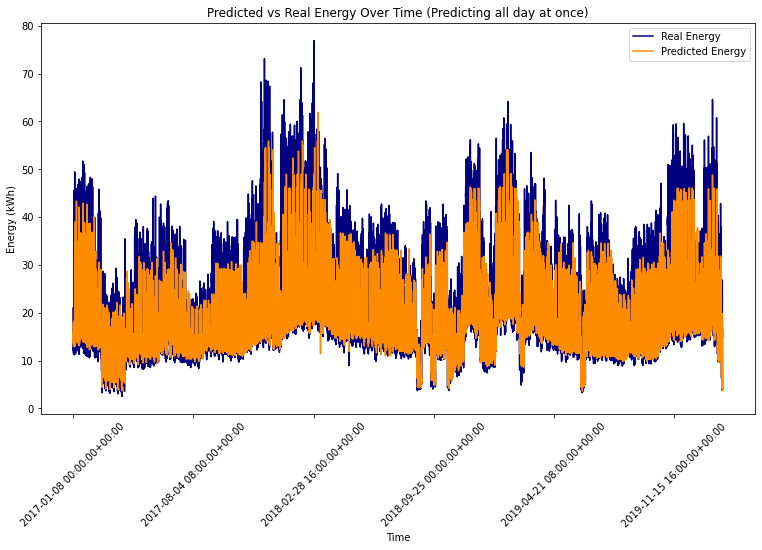

In [34]:
ax = energy_df.plot(y="energy", figsize=(12.8, 7.2), c="navy", label="Real Energy")
energy_df["energy_pred"].plot(ax=ax, c="darkorange", label="Predicted Energy")
plt.xlabel("Time")
plt.ylabel("Energy (kWh)")
plt.title("Predicted vs Real Energy Over Time (Predicting all day at once)")
plt.tick_params(axis="x", rotation=45)
plt.legend()
plt.show()

In [35]:
energy_df["time"] = pd.to_datetime(energy_df.index)

# sum the energy in a day
consumption_pred = energy_df.groupby(energy_df["time"].dt.date).sum()
energy_df.drop("time", axis=1, inplace=True)
consumption_pred.head()


,energy,energy_lag_1,energy_lag_46,energy_lag_328,energy_lag_334,energy_lag_335,energy_lag_336,energy_pred
time,,,,,,,,
2017-01-08,704.6990,704.8260,776.9045,636.7765,626.2460,623.0270,621.4795,695.750183
2017-01-09,1212.0825,1213.1880,704.6655,737.2205,736.7910,737.9110,737.8375,726.578125
2017-01-10,1271.3735,1270.3910,1210.5335,1141.2470,1140.7555,1141.0375,1140.6610,1102.617676
2017-01-11,1152.8515,1152.8605,1271.6145,1215.4875,1212.2645,1211.7735,1210.8200,1164.214844
2017-01-12,1249.3505,1247.8710,1153.0790,1287.2605,1285.9060,1285.1790,1285.8375,1127.470947


In [36]:
# performance metrics
mae = mean_absolute_error(consumption_pred["energy"], consumption_pred["energy_pred"])
mse = mean_squared_error(consumption_pred["energy"], consumption_pred["energy_pred"])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(consumption_pred["energy"], consumption_pred["energy_pred"])
wmape = np.sum(np.abs(consumption_pred["energy_pred"] - consumption_pred["energy"])) / np.sum(
    np.abs(consumption_pred["energy"])
)
r2 = r2_score(consumption_pred["energy"], consumption_pred["energy_pred"])

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"WMAPE: {wmape}")
print(f"R2: {r2}")


MAE: 95.5321493709957
MSE: 18572.46910079438
RMSE: 136.28084641942309
MAPE: 0.09678341209947232
WMAPE: 0.09818727423071026
R2: 0.8198800229529403


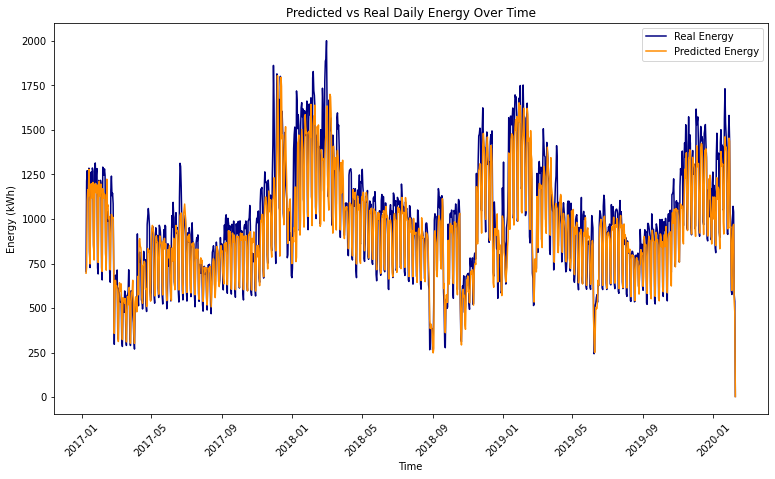

In [37]:
ax = consumption_pred.plot(y="energy", figsize=(12.8, 7.2), c="navy", label="Real Energy")
consumption_pred["energy_pred"].plot(ax=ax, c="darkorange", label="Predicted Energy")
plt.xlabel("Time")
plt.ylabel("Energy (kWh)")
plt.title("Predicted vs Real Daily Energy Over Time")
plt.tick_params(axis="x", rotation=45)
plt.legend()
plt.show()


In [38]:
consumption_pred = consumption_pred[["energy", "energy_pred"]]
production_pred = simulation.groupby(simulation.index.date).sum()
production_pred = production_pred[["production"]]
production_pred.head()

,production
2017-01-08,13.4352
2017-01-09,5.4432
2017-01-10,0.0000
2017-01-11,155.3040
2017-01-12,0.0000


In [39]:
consumption_pred.head()

,energy,energy_pred
time,,
2017-01-08,704.6990,695.750183
2017-01-09,1212.0825,726.578125
2017-01-10,1271.3735,1102.617676
2017-01-11,1152.8515,1164.214844
2017-01-12,1249.3505,1127.470947


In [40]:
energy_df.index = pd.to_datetime(energy_df.index)

cons_m1 = energy_df[(energy_df.index.hour >= 9) & (energy_df.index.hour <= 18)]
cons_m1 = cons_m1.groupby(cons_m1.index.date).sum()
cons_m1 = cons_m1[["energy_pred"]]

# parse index to string
cons_m1.index = pd.to_datetime(cons_m1.index).strftime("%Y-%m-%d")

cons_m1 = cons_m1.to_dict()["energy_pred"]

In [41]:
cons_m2 = energy_df[(energy_df.index.hour >= 6) & (energy_df.index.hour <= 9)]
cons_m2 = cons_m2.groupby(cons_m2.index.date).sum()
cons_m2 = cons_m2[["energy_pred"]]

# parse index to string
cons_m2.index = pd.to_datetime(cons_m2.index).strftime("%Y-%m-%d")

cons_m2 = cons_m2.to_dict()["energy_pred"]


In [42]:
simulation2 = simulation.copy()

simulation2.reset_index(inplace=True)
simulation2.head()

,time,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price
0,2017-01-08 00:00:00+00:00,12.1005,12.285041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.1005,NaN
1,2017-01-08 00:30:00+00:00,15.5335,13.659566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5335,NaN
2,2017-01-08 01:00:00+00:00,15.8120,15.108760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.8120,NaN
3,2017-01-08 01:30:00+00:00,15.2760,15.378116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.2760,NaN
4,2017-01-08 02:00:00+00:00,15.6635,14.970471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.6635,NaN


In [43]:
# remove last row
simulation2 = simulation2.iloc[:-1]
simulation2.tail()

,time,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price
54043,2020-02-07 21:30:00+00:00,4.1560,6.358119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1560,NaN
54044,2020-02-07 22:00:00+00:00,4.1160,3.904633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1160,NaN
54045,2020-02-07 22:30:00+00:00,4.1025,3.871419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1025,NaN
54046,2020-02-07 23:00:00+00:00,4.0775,3.899000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0775,NaN
54047,2020-02-07 23:30:00+00:00,4.1640,3.849933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1640,NaN


In [ ]:
def literature_algorithm(x: pd.array, state_of_charge: float) -> tuple[pd.array, float]:
    day = pd.to_datetime(x.time).strftime("%Y-%m-%d")
    if x.time.hour == 0 and x.time.minute == 0:
        # it is midnight
        consumption_prediction = consumption_pred[
            consumption_pred.index.astype(str) == day
        ]["energy_pred"].values[0]
        production_prediction = production_pred[
            production_pred.index.astype(str) == day
        ]["production"].values[0]

        m1 = cons_m1[day] / consumption_prediction
        m2 = cons_m2[day] / consumption_prediction

        # battery available
        battery_available = BATTERY_CAP - state_of_charge

        if production_prediction > consumption_prediction * m1:
            # production is greater than consumption

            excess = production_prediction - consumption_prediction * m1

            if excess < battery_available:
                # battery is not full
                # charge battery without the excess
                state_of_charge += battery_available - excess
                x["grid_energy"] += (battery_available - excess) / efficiency
                x["saved_to_battery"] += battery_available - excess
                x["losses"] += (
                    (battery_available - excess) * (1 - efficiency) / efficiency
                )
            else:
                # battery will be full
                # charge battery with the consumption in the morning
                state_of_charge += min(consumption_prediction * m2, battery_available)
                x["grid_energy"] += min(
                    consumption_prediction * m2, battery_available
                ) / efficiency
                x["saved_to_battery"] += min(
                    consumption_prediction * m2, battery_available
                )
                x["losses"] += min(consumption_prediction * m2, battery_available) * (
                    1 - efficiency
                ) / efficiency
        else:
            # production is smaller than consumption
            # pre-charge battery to its maximum capacity
            state_of_charge += battery_available
            x["grid_energy"] += battery_available / efficiency
            x["saved_to_battery"] += battery_available
            x["losses"] += battery_available * (1 - efficiency) / efficiency

    return baseline(x, state_of_charge)


In [45]:
simulation2["battery_charge"] = 0
simulation2["losses"] = 0
simulation2["grid_energy"] = 0
simulation2["send_to_grid"] = 0
simulation2["grid_price"] = 0
simulation2["saved_to_battery"] = 0
simulation2["consumed_from_production"] = 0
simulation2["consumed_from_battery"] = 0

state_of_charge = 0

for i in tqdm(range(len(simulation2))):
    simulation2.iloc[i], state_of_charge = literature_algorithm(simulation2.iloc[i], state_of_charge)
    

100%|██████████| 54048/54048 [04:30<00:00, 199.86it/s]


In [46]:
prices = pd.read_csv("../data/MarketPricePT.csv")
prices.columns = ["time", "price"]
prices.time = pd.to_datetime(prices.time, utc=True)

simulation2["grid_price"] = simulation2.merge(prices, on="time", how="left").interpolate(method="pad")["price"] * simulation2["grid_energy"] / 1000
simulation2.head()

,time,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price
0,2017-01-08 00:00:00+00:00,12.1005,12.285041,0.0,3.717992,0.0,12.100500,16.0,0.181508,0.0,31.760000,2.099018
1,2017-01-08 00:30:00+00:00,15.5335,13.659566,0.0,0.000000,0.0,3.662223,0.0,0.055770,0.0,11.871277,0.784573
2,2017-01-08 01:00:00+00:00,15.8120,15.108760,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,15.812000,1.094190
3,2017-01-08 01:30:00+00:00,15.2760,15.378116,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,15.276000,1.057099
4,2017-01-08 02:00:00+00:00,15.6635,14.970471,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,15.663500,0.956570


In [47]:
simulation2.describe()


,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price
count,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000
mean,20.287896,20.307438,4.263905,1.359733,3.396559,0.480988,0.488246,0.009639,2.357553,17.069072,0.906682
std,10.314077,10.019826,9.553100,4.159813,7.572507,2.187771,2.482084,0.036100,7.991015,11.325176,0.697836
min,2.506500,2.833241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.825000,12.962625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.980000,0.489326
50%,17.028500,17.352517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.118250,0.764027
75%,25.407750,25.373833,0.734400,0.000000,0.734400,0.000000,0.000000,0.000000,0.000000,22.648750,1.194562
max,76.893000,74.821167,40.824000,16.000000,39.182400,15.760000,16.000000,0.243655,40.824000,76.893000,5.852040


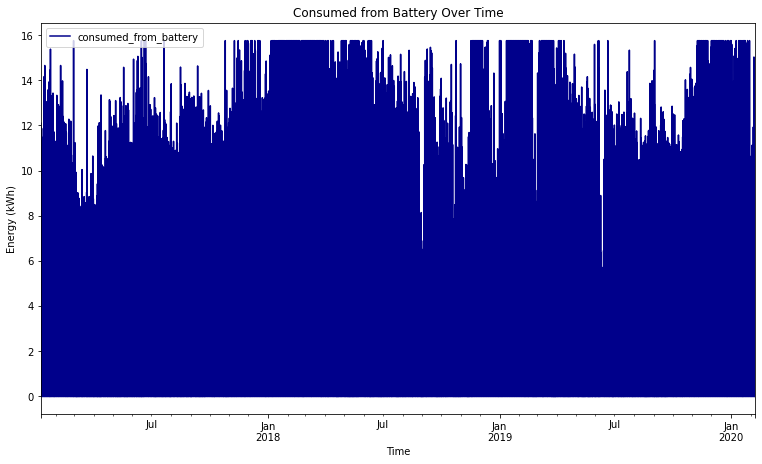

In [48]:
simulation2.plot(x="time", y="consumed_from_battery", figsize=(12.8, 7.2), c="darkblue")
plt.xlabel("Time")
plt.ylabel("Energy (kWh)")
plt.title("Consumed from Battery Over Time")
plt.show()

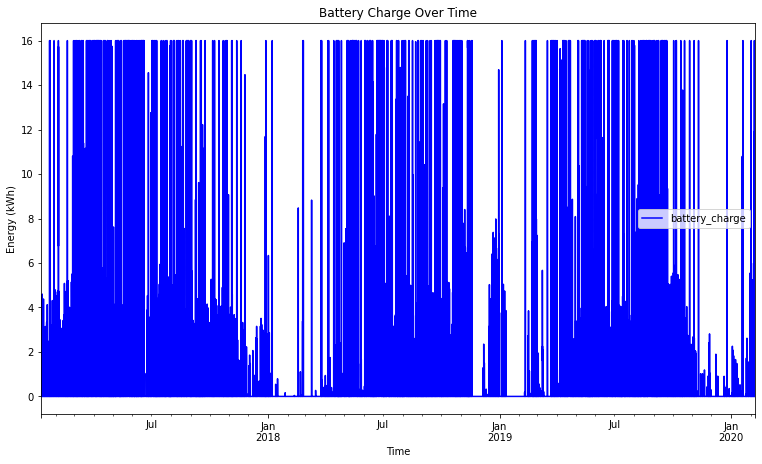

In [49]:
simulation2.plot(x="time", y="battery_charge", figsize=(12.8, 7.2), c="blue")
plt.xlabel("Time")
plt.ylabel("Energy (kWh)")
plt.title("Battery Charge Over Time")
plt.show()

In [50]:
simulation2.sum()

energy                      1.096520e+06
energy_pred                 1.097576e+06
production                  2.304555e+05
battery_charge              7.349082e+04
consumed_from_production    1.835772e+05
consumed_from_battery       2.599645e+04
saved_to_battery            2.638871e+04
losses                      5.209821e+02
send_to_grid                1.274210e+05
grid_energy                 9.225492e+05
grid_price                  4.900435e+04
dtype: float64

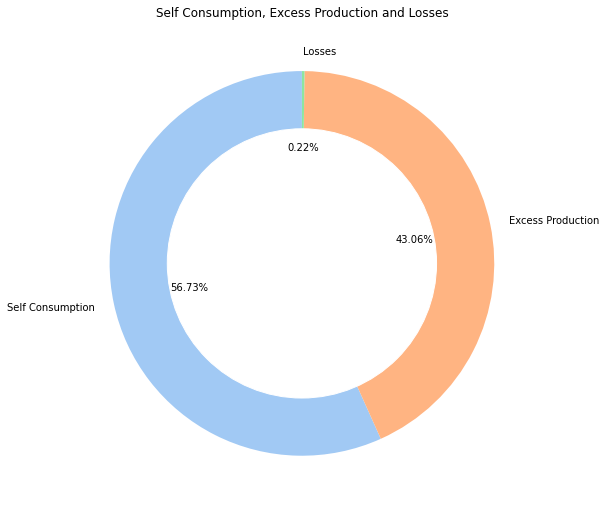

In [51]:
autoconsumo = ((simulation2["consumed_from_production"] + simulation2["saved_to_battery"]) / simulation2["energy"]).sum()
excess_production = (simulation2["send_to_grid"] / simulation2["energy"]).sum()
losses = (simulation2["losses"] / simulation2["energy"]).sum()

plt.figure(figsize=(12.8, 7.2))
colors = sns.color_palette("pastel")
plt.pie([autoconsumo, excess_production, losses], colors=colors, labels=["Self Consumption", "Excess Production", "Losses"], autopct="%1.2f%%",
        startangle=90)
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0, 0), 0.7, color="white"))
plt.title("Self Consumption, Excess Production and Losses")
plt.tight_layout()
plt.show()

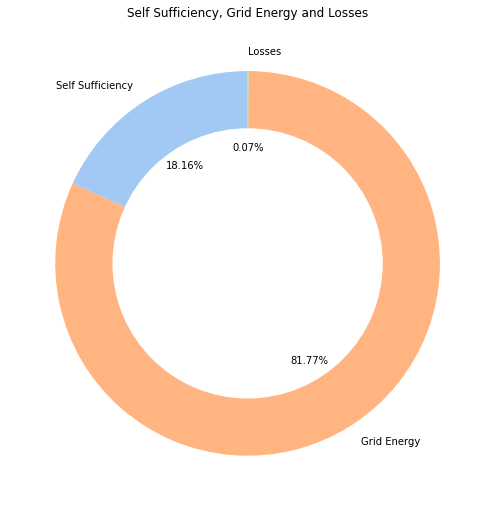

In [52]:
autossuficiencia = ((simulation2["consumed_from_production"] + simulation2["consumed_from_battery"]) / simulation2["energy"]).sum()
gap_production = (simulation2["grid_energy"] / simulation2["energy"]).sum()
losses = (simulation2["losses"] / simulation2["energy"]).sum()

plt.figure(figsize=(12.8, 7.2))
colors = sns.color_palette("pastel")
plt.pie([autossuficiencia, gap_production, losses], colors=colors, labels=["Self Sufficiency", "Grid Energy", "Losses"], autopct="%1.2f%%",
        startangle=90)
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color="white"))
plt.title("Self Sufficiency, Grid Energy and Losses")
plt.tight_layout()
plt.show()

## Tarifas de Acesso à Rede

As tarifas são definidas pela ERSE, que é a entidade responsável pela regulação dos custos de energia.

O preço final da energia é definido pelo preço de mercado, acrescido da tarifa de energia.

As CER beneficiam de isenção de CIEG. Portanto, para BT, as tarifas são:

**Baixa Tensão:**
- *Simples:* 0,0123 €/kWh
- *Ponta*: 0.0157 €/kWh
- *Fora da Ponta*: 0.0056 €/kWh

Em relação ao preço final:

- Simples:
    - $P_{final}(t) = P(e_c(t)) + P(e_c(t)) * 0.0123$

- Bi-horário:
    - Ponta:
        - $P_{final}(t) = P(e_c(t)) + P(e_c(t)) * 0.0157$
    - Fora da Ponta:
        - $P_{final}(t) = P(e_c(t)) + P(e_c(t)) * 0.0056$



In [53]:
prices = pd.read_csv("../data/MarketPricePT.csv")
prices.columns = ["time", "price"]
prices.time = pd.to_datetime(prices.time, utc=True)

simulation2["market_price"] = simulation2.merge(prices, on="time", how="left").interpolate(method="pad")["price"] / 1000

In [268]:
from datetime import timedelta, datetime
import pytz

def tarifa_bihoraria_diaria_ponta(time) -> bool:
    return time.hour >= 8 and time.hour < 22

def tarifa_bihoraria_semanal_ponta(time: datetime) -> bool:
    time = time.astimezone(pytz.timezone("Europe/Lisbon"))

    hour = time.hour
    # if it is daylight savings time
    if time.tz.dst != timedelta(0):
        if time.weekday() == 5:
            # it is saturday
            if hour < 9 or (hour >= 14 and hour < 20) or (hour >= 22):
                tarifa = False
            else:
                tarifa = True
        elif time.weekday() == 6:
            # it is sunday
            tarifa = False
        else:
            if hour < 7:
                tarifa = False
            else:
                tarifa = True
    else:
        if time.weekday() == 5:
            # it is saturday
            if (
                time.to_pydatetime()
                < datetime(
                    time.year,
                    time.month,
                    time.day,
                    9,
                    30,
                    0,
                    tzinfo=pytz.timezone("Europe/Lisbon"),
                )
                or (
                    time.to_pydatetime()
                    >= datetime(
                        time.year,
                        time.month,
                        time.day,
                        13,
                        0,
                        0,
                        tzinfo=pytz.timezone("Europe/Lisbon"),
                    )
                    and time.to_pydatetime()
                    < datetime(
                        time.year,
                        time.month,
                        time.day,
                        18,
                        30,
                        0,
                        tzinfo=pytz.timezone("Europe/Lisbon"),
                    )
                )
                or (
                    time.to_pydatetime()
                    >= datetime(
                        time.year,
                        time.month,
                        time.day,
                        22,
                        0,
                        0,
                        tzinfo=pytz.timezone("Europe/Lisbon"),
                    )
                )
            ):
                tarifa = False
            else:
                tarifa = True
        elif time.weekday() == 6:
            # it is sunday
            tarifa = False
        else:
            if hour < 7:
                tarifa = False
            else:
                tarifa = True
    return tarifa


def tarifa_bihoraria_diaria(line):
    time = line["time"]
    energy = line["grid_energy"]
    tarifa = 0.2047 if tarifa_bihoraria_diaria_ponta(time) else 0.1086
    line["bihorario_diario_simples"] = tarifa * energy
    return line


def tarifa_bihoraria_semanal(line):
    time: pd.Timestamp = line["time"]
    energy: float = line["grid_energy"]
    tarifa = 0.2047 if tarifa_bihoraria_semanal_ponta(time) else 0.1086
    line["bihorario_semanal"] = tarifa * energy
    return line


def simples(line):
    energy = line["grid_energy"]
    line["simples_price"] = 0.1788 * energy
    return line

def add_tarifas(line):
    line = tarifa_bihoraria_diaria(line)
    line = tarifa_bihoraria_semanal(line)
    line = simples(line)
    return line


In [55]:
simulation2 = simulation2.apply(tarifa_bihoraria_diaria, axis=1)
simulation2 = simulation2.apply(tarifa_bihoraria_semanal, axis=1)
simulation2 = simulation2.apply(simples, axis=1)

simulation2.describe()

,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price,market_price,bihorario_diario_simples,bihorario_semanal,simples_price
count,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000,54048.000000
mean,20.287896,20.307435,4.263905,1.359733,3.396559,0.480988,0.488246,0.009639,2.357553,17.069072,0.906682,0.052113,1.110504,1.111139,1.116632
std,10.314077,10.019826,9.553100,4.159813,7.572507,2.187771,2.482084,0.036100,7.991015,11.325176,0.697836,0.012355,0.868676,0.871727,0.828768
min,2.506500,2.833241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000
25%,12.825000,12.962625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.980000,0.489326,0.044720,0.591062,0.578609,0.630362
50%,17.028500,17.352517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.118250,0.764027,0.051750,0.908234,0.910565,0.953471
75%,25.407750,25.373833,0.734400,0.000000,0.734400,0.000000,0.000000,0.000000,0.000000,22.648750,1.194562,0.060070,1.470024,1.486539,1.465171
max,76.893000,74.821167,40.824000,16.000000,39.182400,15.760000,16.000000,0.243655,40.824000,76.893000,5.852040,0.101990,7.000503,7.000503,6.751791


In [56]:
simulation2.sum()

energy                      1.096520e+06
energy_pred                 1.097576e+06
production                  2.304555e+05
battery_charge              7.349082e+04
consumed_from_production    1.835772e+05
consumed_from_battery       2.599645e+04
saved_to_battery            2.638871e+04
losses                      5.209821e+02
send_to_grid                1.274210e+05
grid_energy                 9.225492e+05
grid_price                  4.900435e+04
market_price                2.816601e+03
bihorario_diario_simples    6.002053e+04
bihorario_semanal           6.005483e+04
simples_price               6.035170e+04
dtype: float64

In [57]:
simulation2["final_price_diario"] = simulation2["bihorario_diario_simples"] - simulation2["send_to_grid"] * (simulation2["market_price"] / 4)
simulation2["final_price_semanal"] = simulation2["bihorario_semanal"] - simulation2["send_to_grid"] * (simulation2["market_price"] / 4)
simulation2["final_simples"] = simulation2["simples_price"] - simulation2["send_to_grid"] * (simulation2["market_price"] / 4)
simulation2.sum()

energy                      1.096520e+06
energy_pred                 1.097576e+06
production                  2.304555e+05
battery_charge              7.349082e+04
consumed_from_production    1.835772e+05
consumed_from_battery       2.599645e+04
saved_to_battery            2.638871e+04
losses                      5.209821e+02
send_to_grid                1.274210e+05
grid_energy                 9.225492e+05
grid_price                  4.900435e+04
market_price                2.816601e+03
bihorario_diario_simples    6.002053e+04
bihorario_semanal           6.005483e+04
simples_price               6.035170e+04
final_price_diario          5.836981e+04
final_price_semanal         5.840411e+04
final_simples               5.870099e+04
dtype: float64

In [58]:
simulation["market_price"] = simulation2["market_price"]
simulation.head()

,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price,market_price
time,,,,,,,,,,,,
2017-01-08 00:00:00+00:00,12.1005,12.285041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.1005,NaN,NaN
2017-01-08 00:30:00+00:00,15.5335,13.659566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5335,NaN,NaN
2017-01-08 01:00:00+00:00,15.8120,15.108760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.8120,NaN,NaN
2017-01-08 01:30:00+00:00,15.2760,15.378116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.2760,NaN,NaN
2017-01-08 02:00:00+00:00,15.6635,14.970471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.6635,NaN,NaN


In [59]:
simulation["grid_price"] = simulation["market_price"] * simulation["grid_energy"]

In [61]:
simulation.reset_index(inplace=True)

In [62]:
simulation = simulation.apply(tarifa_bihoraria_diaria, axis=1)
simulation = simulation.apply(tarifa_bihoraria_semanal, axis=1)
simulation = simulation.apply(simples, axis=1)

simulation.describe()

,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price,market_price,bihorario_diario_simples,bihorario_semanal,simples_price
count,54049.000000,54049.000000,54049.000000,54049.000000,54049.000000,54049.000000,54049.000000,54049.000000,54049.000000,54049.000000,0.0,0.0,0.0,0.0,0.0
mean,20.287596,20.307133,4.263826,1.293555,3.396496,0.154067,0.156393,0.004707,2.357510,16.737033,NaN,NaN,NaN,NaN,NaN
std,10.314216,10.019980,9.553029,4.137527,7.572451,1.073487,1.035676,0.022363,7.990947,11.083715,NaN,NaN,NaN,NaN,NaN
min,2.506500,2.833241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,12.825000,12.962095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.041000,NaN,NaN,NaN,NaN,NaN
50%,17.028000,17.352509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.843500,NaN,NaN,NaN,NaN,NaN
75%,25.407000,25.373648,0.734400,0.000000,0.734400,0.000000,0.000000,0.000000,0.000000,21.710000,NaN,NaN,NaN,NaN,NaN
max,76.893000,74.821167,40.824000,16.000000,39.182400,15.760000,16.000000,0.243655,40.824000,76.893000,NaN,NaN,NaN,NaN,NaN


In [63]:
simulation["final_price_diario"] = simulation["bihorario_diario_simples"] - simulation["send_to_grid"] * (simulation["market_price"] / 4)
simulation["final_price_semanal"] = simulation["bihorario_semanal"] - simulation["send_to_grid"] * (simulation["market_price"] / 4)
simulation["final_simples"] = simulation["simples_price"] - simulation["send_to_grid"] * (simulation["market_price"] / 4)

simulation.sum()

energy                      1.096524e+06
energy_pred                 1.097580e+06
production                  2.304555e+05
battery_charge              6.991535e+04
consumed_from_production    1.835772e+05
consumed_from_battery       8.327182e+03
saved_to_battery            8.452859e+03
losses                      2.544005e+02
send_to_grid                1.274210e+05
grid_energy                 9.046199e+05
grid_price                  0.000000e+00
market_price                0.000000e+00
bihorario_diario_simples    0.000000e+00
bihorario_semanal           0.000000e+00
simples_price               0.000000e+00
final_price_diario          0.000000e+00
final_price_semanal         0.000000e+00
final_simples               0.000000e+00
dtype: float64

In [64]:
simulation2.head()

,time,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price,market_price,bihorario_diario_simples,bihorario_semanal,simples_price,final_price_diario,final_price_semanal,final_simples
0,2017-01-08 00:00:00+00:00,12.1005,12.285041,0.0,3.717992,0.0,12.100500,16.0,0.181508,0.0,31.760000,2.099018,0.06609,2.276874,2.276874,2.489666,2.276874,2.276874,2.489666
1,2017-01-08 00:30:00+00:00,15.5335,13.659566,0.0,0.000000,0.0,3.662223,0.0,0.055770,0.0,11.871277,0.784573,0.06609,0.851052,0.851052,0.930589,0.851052,0.851052,0.930589
2,2017-01-08 01:00:00+00:00,15.8120,15.108760,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,15.812000,1.094190,0.06920,1.182738,1.182738,1.288678,1.182738,1.182738,1.288678
3,2017-01-08 01:30:00+00:00,15.2760,15.378116,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,15.276000,1.057099,0.06920,1.142645,1.142645,1.244994,1.142645,1.142645,1.244994
4,2017-01-08 02:00:00+00:00,15.6635,14.970471,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,15.663500,0.956570,0.06107,1.044286,1.044286,1.149231,1.044286,1.044286,1.149231


In [65]:
simulation.head()

,time,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price,market_price,bihorario_diario_simples,bihorario_semanal,simples_price,final_price_diario,final_price_semanal,final_simples
0,2017-01-08 00:00:00+00:00,12.1005,12.285041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-08 00:30:00+00:00,15.5335,13.659566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-08 01:00:00+00:00,15.8120,15.108760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.8120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-08 01:30:00+00:00,15.2760,15.378116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.2760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-08 02:00:00+00:00,15.6635,14.970471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.6635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Simulation 3, 4, and 5


In [66]:
def literature_algorithm_adapted(x, state_of_charge, tarifa):
    day = pd.to_datetime(x.time).strftime("%Y-%m-%d")
    # battery available
    battery_available = BATTERY_CAP - state_of_charge
    
    if x.time.hour == 0 and x.time.minute == 0:
        # it is midnight
        consumption_prediction = consumption_pred[
            consumption_pred.index.astype(str) == day
        ]["energy_pred"].values[0]
        production_prediction = production_pred[
            production_pred.index.astype(str) == day
        ]["production"].values[0]

        m1 = cons_m1[day] / consumption_prediction
        m2 = cons_m2[day] / consumption_prediction

        if production_prediction > consumption_prediction * m1:
            # production is greater than consumption

            excess = production_prediction - consumption_prediction * m1

            if excess < battery_available:
                # battery is not full
                # charge battery without the excess
                state_of_charge += battery_available - excess
                x["grid_energy"] += (battery_available - excess) / efficiency
                x["saved_to_battery"] += battery_available - excess
                x["losses"] += (battery_available - excess) * (1 - efficiency) / efficiency
            else:
                # battery will be full
                # charge battery with the consumption in the morning
                state_of_charge += min(consumption_prediction * m2, battery_available)
                x["grid_energy"] += min(
                    consumption_prediction * m2, battery_available
                ) / efficiency
                x["saved_to_battery"] += min(
                    consumption_prediction * m2, battery_available
                )
                x["losses"] += min(consumption_prediction * m2, battery_available) * (
                    1 - efficiency
                ) / efficiency
        else:
            # production is smaller than consumption
            # pre-charge battery to its maximum capacity
            state_of_charge += battery_available
            x["grid_energy"] += battery_available / efficiency
            x["saved_to_battery"] += battery_available
            x["losses"] += battery_available * (1 - efficiency) / efficiency
    if not tarifa(x.time):
        # not hora de ponta

        to_consume = x["energy"]
        # only consume from production and grid
        # if the energy predicted to consume is greater than the energy produced
        if x["production"] < x["energy"]:
            # consume the energy produced
            to_consume -= x["production"]
            x["consumed_from_production"] += x["production"]
        else:
            # if the energy predicted to consume is less than the energy produced
            # consume the energy predicted to consume
            x["consumed_from_production"] = to_consume
            to_consume = 0

            # add the produced energy to the battery
            x["battery_charge"] += min(
                (x["production"] - x["energy"]) * efficiency, battery_available
            )
            # log the energy saved in the battery
            x["saved_to_battery"] += min(
                (x["production"] - x["energy"]) * efficiency, battery_available
            )
            x["losses"] += x["saved_to_battery"] * (1 - efficiency) / efficiency
            # send the rest of the energy to the grid
            x["send_to_grid"] = x["production"] - x["saved_to_battery"] - x["losses"]

        # fetch the rest of the energy to the grid
        x["grid_energy"] += to_consume
        state_of_charge = x["battery_charge"]
        return x, state_of_charge
    return baseline(x, state_of_charge)


In [67]:
simulation3 = simulation.copy()

# drop last row
simulation3 = simulation3.drop(simulation3.tail(1).index)

simulation3.head()


,time,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price,market_price,bihorario_diario_simples,bihorario_semanal,simples_price,final_price_diario,final_price_semanal,final_simples
0,2017-01-08 00:00:00+00:00,12.1005,12.285041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-08 00:30:00+00:00,15.5335,13.659566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-08 01:00:00+00:00,15.8120,15.108760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.8120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-08 01:30:00+00:00,15.2760,15.378116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.2760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-08 02:00:00+00:00,15.6635,14.970471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.6635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
simulation3["battery_charge"] = 0
simulation3["consumed_from_production"] = 0
simulation3["consumed_from_battery"] = 0
simulation3["send_to_grid"] = 0
simulation3["saved_to_battery"] = 0
simulation3["losses"] = 0
simulation3["grid_energy"] = 0

state_of_charge = 0

for i in tqdm(range(len(simulation3))):
    simulation3.iloc[i], state_of_charge = literature_algorithm_adapted(
        simulation3.iloc[i], state_of_charge, tarifa_bihoraria_diaria_ponta
    )

100%|██████████| 54048/54048 [06:24<00:00, 140.45it/s]


In [69]:
simulation4 = simulation3.copy()

simulation4["battery_charge"] = 0
simulation4["consumed_from_production"] = 0
simulation4["consumed_from_battery"] = 0
simulation4["send_to_grid"] = 0
simulation4["saved_to_battery"] = 0
simulation4["losses"] = 0
simulation4["grid_energy"] = 0

state_of_charge = 0

for i in tqdm(range(len(simulation4))):
    simulation4.iloc[i], state_of_charge = literature_algorithm_adapted(
        simulation4.iloc[i], state_of_charge, tarifa_bihoraria_semanal_ponta
    )

100%|██████████| 54048/54048 [06:33<00:00, 137.41it/s]


In [70]:
simulation5 = simulation4.copy()

simulation5["battery_charge"] = 0
simulation5["consumed_from_production"] = 0
simulation5["consumed_from_battery"] = 0
simulation5["send_to_grid"] = 0
simulation5["saved_to_battery"] = 0
simulation5["losses"] = 0
simulation5["grid_energy"] = 0

state_of_charge = 0

for i in tqdm(range(len(simulation5))):
    simulation5.iloc[i], state_of_charge = literature_algorithm_adapted(
        simulation5.iloc[i], state_of_charge, lambda time: time.hour >= 10
    )

100%|██████████| 54048/54048 [06:45<00:00, 133.15it/s]


In [71]:
simulation3["market_price"] = simulation3.merge(prices, on="time", how="left").interpolate(method="pad")["price"] / 1000
simulation4["market_price"] = simulation4.merge(prices, on="time", how="left").interpolate(method="pad")["price"] / 1000
simulation5["market_price"] = simulation5.merge(prices, on="time", how="left").interpolate(method="pad")["price"] / 1000

simulation3.head()

,time,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price,market_price,bihorario_diario_simples,bihorario_semanal,simples_price,final_price_diario,final_price_semanal,final_simples
0,2017-01-08 00:00:00+00:00,12.1005,12.285041,0.0,0.0,0.0,0.0,16.0,0.24,0.0,43.8605,NaN,0.06609,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-08 00:30:00+00:00,15.5335,13.659566,0.0,0.0,0.0,0.0,0.0,0.00,0.0,15.5335,NaN,0.06609,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-08 01:00:00+00:00,15.8120,15.108760,0.0,0.0,0.0,0.0,0.0,0.00,0.0,15.8120,NaN,0.06920,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-08 01:30:00+00:00,15.2760,15.378116,0.0,0.0,0.0,0.0,0.0,0.00,0.0,15.2760,NaN,0.06920,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-08 02:00:00+00:00,15.6635,14.970471,0.0,0.0,0.0,0.0,0.0,0.00,0.0,15.6635,NaN,0.06107,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
simulation4.head()

,time,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price,market_price,bihorario_diario_simples,bihorario_semanal,simples_price,final_price_diario,final_price_semanal,final_simples
0,2017-01-08 00:00:00+00:00,12.1005,12.285041,0.0,0.0,0.0,0.0,16.0,0.24,0.0,43.8605,NaN,0.06609,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-08 00:30:00+00:00,15.5335,13.659566,0.0,0.0,0.0,0.0,0.0,0.00,0.0,15.5335,NaN,0.06609,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-08 01:00:00+00:00,15.8120,15.108760,0.0,0.0,0.0,0.0,0.0,0.00,0.0,15.8120,NaN,0.06920,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-08 01:30:00+00:00,15.2760,15.378116,0.0,0.0,0.0,0.0,0.0,0.00,0.0,15.2760,NaN,0.06920,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-08 02:00:00+00:00,15.6635,14.970471,0.0,0.0,0.0,0.0,0.0,0.00,0.0,15.6635,NaN,0.06107,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
simulation5.head()

,time,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price,market_price,bihorario_diario_simples,bihorario_semanal,simples_price,final_price_diario,final_price_semanal,final_simples
0,2017-01-08 00:00:00+00:00,12.1005,12.285041,0.0,0.0,0.0,0.0,16.0,0.24,0.0,43.8605,NaN,0.06609,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-08 00:30:00+00:00,15.5335,13.659566,0.0,0.0,0.0,0.0,0.0,0.00,0.0,15.5335,NaN,0.06609,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-08 01:00:00+00:00,15.8120,15.108760,0.0,0.0,0.0,0.0,0.0,0.00,0.0,15.8120,NaN,0.06920,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-08 01:30:00+00:00,15.2760,15.378116,0.0,0.0,0.0,0.0,0.0,0.00,0.0,15.2760,NaN,0.06920,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-08 02:00:00+00:00,15.6635,14.970471,0.0,0.0,0.0,0.0,0.0,0.00,0.0,15.6635,NaN,0.06107,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
simulation3["grid_price"] = simulation3["market_price"] * simulation3["grid_energy"]
simulation4["grid_price"] = simulation4["market_price"] * simulation4["grid_energy"]
simulation5["grid_price"] = simulation5["market_price"] * simulation5["grid_energy"]

In [75]:
simulation3 = simulation3.apply(tarifa_bihoraria_diaria, axis=1)
simulation3 = simulation3.apply(tarifa_bihoraria_semanal, axis=1)
simulation3 = simulation3.apply(simples, axis=1)
simulation4 = simulation4.apply(tarifa_bihoraria_diaria, axis=1)
simulation4 = simulation4.apply(tarifa_bihoraria_semanal, axis=1)
simulation4 = simulation4.apply(simples, axis=1)


In [76]:
simulation5 = simulation5.apply(tarifa_bihoraria_diaria, axis=1)
simulation5 = simulation5.apply(tarifa_bihoraria_semanal, axis=1)
simulation5 = simulation5.apply(simples, axis=1)

In [77]:
simulation3["final_price_diario"] = simulation3["bihorario_diario_simples"] - simulation3["send_to_grid"] * simulation3["market_price"] / 4
simulation3["final_price_semanal"] = simulation3["bihorario_semanal"] - simulation3["send_to_grid"] * simulation3["market_price"] / 4
simulation3["final_simples"] = simulation3["simples_price"] - simulation3["send_to_grid"] * simulation3["market_price"] / 4

simulation3.sum()

energy                      1.096520e+06
energy_pred                 1.097576e+06
production                  2.304555e+05
battery_charge              6.726525e+04
consumed_from_production    1.835772e+05
consumed_from_battery       8.012296e+03
saved_to_battery            2.788830e+04
losses                      5.415233e+02
send_to_grid                1.258986e+05
grid_energy                 9.405334e+05
grid_price                  4.999194e+04
market_price                2.816601e+03
bihorario_diario_simples    6.111110e+04
bihorario_semanal           6.114574e+04
simples_price               6.156050e+04
final_price_diario          5.947869e+04
final_price_semanal         5.951333e+04
final_simples               5.992809e+04
dtype: float64

In [78]:
simulation4["final_price_diario"] = simulation4["bihorario_diario_simples"] - simulation4["send_to_grid"] * simulation4["market_price"] / 4
simulation4["final_price_semanal"] = simulation4["bihorario_semanal"] - simulation4["send_to_grid"] * simulation4["market_price"] / 4
simulation4["final_simples"] = simulation4["simples_price"] - simulation4["send_to_grid"] * simulation4["market_price"] / 4

simulation4.sum()

energy                      1.096520e+06
energy_pred                 1.097576e+06
production                  2.304555e+05
battery_charge              5.504814e+04
consumed_from_production    1.835772e+05
consumed_from_battery       5.366478e+03
saved_to_battery            3.502349e+04
losses                      6.102991e+02
send_to_grid                1.186548e+05
grid_energy                 9.431792e+05
grid_price                  5.011336e+04
market_price                2.816601e+03
bihorario_diario_simples    6.127473e+04
bihorario_semanal           6.128200e+04
simples_price               6.171447e+04
final_price_diario          5.972894e+04
final_price_semanal         5.973621e+04
final_simples               6.016868e+04
dtype: float64

In [79]:
simulation5["final_price_diario"] = simulation5["bihorario_diario_simples"] - simulation5["send_to_grid"] * simulation5["market_price"] / 4
simulation5["final_price_semanal"] = simulation5["bihorario_semanal"] - simulation5["send_to_grid"] * simulation5["market_price"] / 4
simulation5["final_simples"] = simulation5["simples_price"] - simulation5["send_to_grid"] * simulation5["market_price"] / 4

simulation5.sum()

energy                      1.096520e+06
energy_pred                 1.097576e+06
production                  2.304555e+05
battery_charge              6.134578e+04
consumed_from_production    1.835772e+05
consumed_from_battery       7.020959e+03
saved_to_battery            3.089790e+04
losses                      5.723858e+02
send_to_grid                1.228432e+05
grid_energy                 9.415247e+05
grid_price                  5.004177e+04
market_price                2.816601e+03
bihorario_diario_simples    6.117653e+04
bihorario_semanal           6.120877e+04
simples_price               6.162252e+04
final_price_diario          5.958163e+04
final_price_semanal         5.961387e+04
final_simples               6.002763e+04
dtype: float64

In [80]:
print("Baseline:\n", simulation[["final_price_diario", "final_price_semanal", "final_simples"]].sum(), "\n")
print("Literature:\n", simulation2[["final_price_diario", "final_price_semanal", "final_simples"]].sum(), "\n")
print("Literature tarifa diaria:\n", simulation3[["final_price_diario", "final_price_semanal", "final_simples"]].sum(), "\n")
print("Literature tarifa semanal:\n", simulation4[["final_price_diario", "final_price_semanal", "final_simples"]].sum(), "\n")
print("Literature >= 10h:\n", simulation5[["final_price_diario", "final_price_semanal", "final_simples"]].sum(), "\n")

Baseline:
 final_price_diario     0.0
final_price_semanal    0.0
final_simples          0.0
dtype: float64 

Literature:
 final_price_diario     58369.813997
final_price_semanal    58404.113368
final_simples          58700.989649
dtype: float64 

Literature tarifa diaria:
 final_price_diario     59478.691307
final_price_semanal    59513.334127
final_simples          59928.093852
dtype: float64 

Literature tarifa semanal:
 final_price_diario     59728.936449
final_price_semanal    59736.213322
final_simples          60168.678842
dtype: float64 

Literature >= 10h:
 final_price_diario     59581.628819
final_price_semanal    59613.871798
final_simples          60027.625290
dtype: float64 



## Simulation 6

In [81]:
def new_algorithm(x, state_of_charge):
    """
    Equal to Baseline, but only taking from the batteries the equivalent to the ratio of the battery to consume for the day.
    """
    day = pd.to_datetime(x["time"]).strftime("%Y-%m-%d")

    x["battery_charge"] = state_of_charge
    # energy predicted to consume
    to_consume = x["energy"]

    # if the energy predicted to consume is greater than the energy produced
    if x["production"] < x["energy"]:
        # consume the energy produced
        to_consume -= x["production"]
        x["consumed_from_production"] = x["production"]

        # go fetch part of it to the battery
        # using the ratio of the battery to consume now and the battery to consume in the day
        ratio = (
            x["energy_pred"]
            / consumption_pred[consumption_pred.index.astype(str) == day][
                "energy_pred"
            ].values[0]
        )

        # energy to consume from the battery if there is enough in the battery
        to_consume_from_battery = to_consume * ratio

        if to_consume_from_battery > x["battery_charge"] * efficiency:
            # if the battery energy is not enough
            # consume all the energy from the battery
            to_consume -= x["battery_charge"] * efficiency
            x["consumed_from_battery"] = x["battery_charge"] * efficiency
            # add loss from the battery
            x["losses"] = x["battery_charge"] * (1 - efficiency)
            x["battery_charge"] = 0
        else:
            # if the battery energy is enough
            x["battery_charge"] -= to_consume_from_battery + to_consume_from_battery * (1 - efficiency)
            x["consumed_from_battery"] = to_consume_from_battery
            # add loss from the battery
            x["losses"] = to_consume_from_battery * (1 - efficiency)
            to_consume -= to_consume_from_battery
    else:
        # if the energy predicted to consume is less than the energy produced
        # consume the energy predicted to consume
        x["consumed_from_production"] = to_consume
        to_consume = 0

        # empty space in the battery
        possible_charge = BATTERY_CAP - x["battery_charge"]
        # add the produced energy to the battery
        x["battery_charge"] += min(
            (x["production"] - x["energy"]) * efficiency, possible_charge
        )
        # log the energy saved in the battery
        x["saved_to_battery"] += min(
            (x["production"] - x["energy"]) * efficiency, possible_charge
        )
        x["losses"] += x["saved_to_battery"] * (1 - efficiency) / efficiency
        # send the rest of the energy to the grid
        x["send_to_grid"] = x["production"] - x["saved_to_battery"] - x["losses"]

    # fetch the rest of the energy to the grid
    x["grid_energy"] += to_consume
    state_of_charge = x["battery_charge"]
    return x, state_of_charge


def literature_algorithm_new_algorithm(x, state_of_charge):
    """
    Join the literature algorithm with the new algorithm.
    """
    day = pd.to_datetime(x.time).strftime("%Y-%m-%d")
    if x.time.hour == 0 and x.time.minute == 0:
        # it is midnight
        consumption_prediction = consumption_pred[consumption_pred.index.astype(str) == day]["energy_pred"].values[0]
        production_prediction = production_pred[production_pred.index.astype(str) == day]["production"].values[0]

        m1 = cons_m1[day] / consumption_prediction
        m2 = cons_m2[day] / consumption_prediction

        # battery available
        battery_available = BATTERY_CAP - state_of_charge

        if production_prediction > consumption_prediction * m1:
            # production is greater than consumption

            excess = production_prediction - consumption_prediction * m1

            if excess < battery_available:
                # battery is not full
                # charge battery without the excess
                state_of_charge += battery_available - excess
                x["grid_energy"] += (battery_available - excess) / efficiency
                x["saved_to_battery"] += battery_available - excess
                x["losses"] += (battery_available - excess) * (1 - efficiency) / efficiency
            else:
                # battery will be full
                # charge battery with the consumption in the morning
                state_of_charge += min(consumption_prediction * m2, battery_available)
                x["grid_energy"] += min(
                    consumption_prediction * m2, battery_available
                ) / efficiency
                x["saved_to_battery"] += min(
                    consumption_prediction * m2, battery_available
                )
                x["losses"] += min(consumption_prediction * m2, battery_available) * (
                    1 - efficiency
                ) / efficiency
        else:
            # production is smaller than consumption
            # pre-charge battery to its maximum capacity
            state_of_charge += battery_available
            x["grid_energy"] += battery_available / efficiency
            x["saved_to_battery"] += battery_available
            x["losses"] += battery_available * (1 - efficiency) / efficiency

    return new_algorithm(x, state_of_charge)


In [82]:
simulation6 = simulation5.copy()

simulation6["battery_charge"] = 0
simulation6["grid_energy"] = 0
simulation6["consumed_from_production"] = 0
simulation6["consumed_from_battery"] = 0
simulation6["saved_to_battery"] = 0
simulation6["losses"] = 0
simulation6["send_to_grid"] = 0

simulation6.tail()

,time,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price,market_price,bihorario_diario_simples,bihorario_semanal,simples_price,final_price_diario,final_price_semanal,final_simples
54043,2020-02-07 21:30:00+00:00,4.1560,6.358119,0.0,0,0,0,0,0,0,0,0.182864,0.04400,0.248113,0.248113,0.233983,0.248113,0.248113,0.233983
54044,2020-02-07 22:00:00+00:00,4.1160,3.904633,0.0,0,0,0,0,0,0,0,0.181104,0.04400,0.204154,0.245725,0.231731,0.204154,0.245725,0.231731
54045,2020-02-07 22:30:00+00:00,4.1025,3.871419,0.0,0,0,0,0,0,0,0,0.180551,0.04401,0.203525,0.244960,0.231012,0.203525,0.244960,0.231012
54046,2020-02-07 23:00:00+00:00,4.0775,3.899000,0.0,0,0,0,0,0,0,0,0.179451,0.04401,0.202285,0.243468,0.229604,0.202285,0.243468,0.229604
54047,2020-02-07 23:30:00+00:00,4.1640,3.849933,0.0,0,0,0,0,0,0,0,0.180176,0.04327,0.203495,0.245551,0.231393,0.203495,0.245551,0.231393


In [83]:
state_of_charge = 0

for i in tqdm(range(len(simulation6))):
    simulation6.iloc[i], state_of_charge = new_algorithm(simulation6.iloc[i], state_of_charge)

100%|██████████| 54048/54048 [08:10<00:00, 110.29it/s]


In [84]:
simulation6["grid_price"] = simulation6.merge(prices, on="time", how="left").interpolate(method="pad")["price"] * simulation6["grid_energy"] / 1000
simulation6.head()

,time,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price,market_price,bihorario_diario_simples,bihorario_semanal,simples_price,final_price_diario,final_price_semanal,final_simples
0,2017-01-08 00:00:00+00:00,12.1005,12.285041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.1005,0.799722,0.06609,3.144359,3.144359,3.438225,3.144359,3.144359,3.438225
1,2017-01-08 00:30:00+00:00,15.5335,13.659566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5335,1.026609,0.06609,1.113597,1.113597,1.217671,1.113597,1.113597,1.217671
2,2017-01-08 01:00:00+00:00,15.8120,15.108760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.8120,1.094190,0.06920,1.182738,1.182738,1.288678,1.182738,1.182738,1.288678
3,2017-01-08 01:30:00+00:00,15.2760,15.378116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.2760,1.057099,0.06920,1.142645,1.142645,1.244994,1.142645,1.142645,1.244994
4,2017-01-08 02:00:00+00:00,15.6635,14.970471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.6635,0.956570,0.06107,1.044286,1.044286,1.149231,1.044286,1.044286,1.149231


In [85]:
simulation6 = simulation6.apply(tarifa_bihoraria_diaria, axis=1)
simulation6 = simulation6.apply(tarifa_bihoraria_semanal, axis=1)
simulation6 = simulation6.apply(simples, axis=1)

simulation6.sum()

energy                      1.096520e+06
energy_pred                 1.097576e+06
production                  2.304555e+05
battery_charge              2.379794e+05
consumed_from_production    1.835772e+05
consumed_from_battery       4.748918e+03
saved_to_battery            4.832309e+03
losses                      1.448419e+02
send_to_grid                1.310967e+05
grid_energy                 9.081941e+05
grid_price                  4.818872e+04
market_price                2.816601e+03
bihorario_diario_simples    5.917777e+04
bihorario_semanal           5.918790e+04
simples_price               5.935951e+04
final_price_diario          5.958163e+04
final_price_semanal         5.961387e+04
final_simples               6.002763e+04
dtype: float64

In [86]:
simulation6["final_price_diario"] = simulation6["bihorario_diario_simples"] - simulation6["send_to_grid"] * (simulation6["market_price"] / 4)
simulation6["final_price_semanal"] = simulation6["bihorario_semanal"] - simulation6["send_to_grid"] * (simulation6["market_price"] / 4)
simulation6["final_simples"] = simulation6["simples_price"] - simulation6["send_to_grid"] * (simulation6["market_price"] / 4)
simulation6.sum()

energy                      1.096520e+06
energy_pred                 1.097576e+06
production                  2.304555e+05
battery_charge              2.379794e+05
consumed_from_production    1.835772e+05
consumed_from_battery       4.748918e+03
saved_to_battery            4.832309e+03
losses                      1.448419e+02
send_to_grid                1.310967e+05
grid_energy                 9.081941e+05
grid_price                  4.818872e+04
market_price                2.816601e+03
bihorario_diario_simples    5.917777e+04
bihorario_semanal           5.918790e+04
simples_price               5.935951e+04
final_price_diario          5.748137e+04
final_price_semanal         5.749149e+04
final_simples               5.766310e+04
dtype: float64

## Simulation 7

In [87]:
simulation7 = simulation6.copy()

simulation7["battery_charge"] = 0
simulation7["grid_energy"] = 0
simulation7["consumed_from_production"] = 0
simulation7["consumed_from_battery"] = 0
simulation7["saved_to_battery"] = 0
simulation7["losses"] = 0
simulation7["send_to_grid"] = 0

state_of_charge = 0

for i in tqdm(range(len(simulation7))):
    simulation7.iloc[i], state_of_charge = literature_algorithm_new_algorithm(
        simulation7.iloc[i], state_of_charge
    )


100%|██████████| 54048/54048 [09:20<00:00, 96.51it/s] 


In [101]:
simulation7["market_price"] = simulation7.merge(prices, on="time", how="left").interpolate(method="pad")["price"] / 1000

simulation7.head()

,time,energy,energy_pred,production,battery_charge,consumed_from_production,consumed_from_battery,saved_to_battery,losses,send_to_grid,grid_energy,grid_price,market_price,bihorario_diario_simples,bihorario_semanal,simples_price,final_price_diario,final_price_semanal,final_simples
0,2017-01-08 00:00:00+00:00,12.1005,12.285041,0.0,15.783133,0.0,0.213662,16.0,0.003205,0.0,43.646838,125.904523,0.06609,126.148945,126.148945,126.441379,126.148945,126.148945,126.441379
1,2017-01-08 00:30:00+00:00,15.5335,13.659566,0.0,15.473592,0.0,0.304967,0.0,0.004575,0.0,15.228533,15.326814,0.06609,15.412094,15.412094,15.514125,15.412094,15.412094,15.514125
2,2017-01-08 01:00:00+00:00,15.8120,15.108760,0.0,15.125071,0.0,0.343370,0.0,0.005151,0.0,15.468630,16.558073,0.06920,16.644698,16.644698,16.748337,16.644698,16.644698,16.748337
3,2017-01-08 01:30:00+00:00,15.2760,15.378116,0.0,14.782362,0.0,0.337644,0.0,0.005065,0.0,14.938356,15.442289,0.06920,15.525944,15.525944,15.626031,15.525944,15.525944,15.626031
4,2017-01-08 02:00:00+00:00,15.6635,14.970471,0.0,14.440275,0.0,0.337032,0.0,0.005055,0.0,15.326468,14.345381,0.06107,14.431209,14.431209,14.533897,14.431209,14.431209,14.533897


In [102]:
simulation7["grid_price"] = simulation7["market_price"] * simulation7["grid_energy"]

In [103]:
simulation7 = simulation7.apply(tarifa_bihoraria_diaria, axis=1)
simulation7 = simulation7.apply(tarifa_bihoraria_semanal, axis=1)
simulation7 = simulation7.apply(simples, axis=1)

In [104]:
simulation7["final_price_diario"] = simulation7["bihorario_diario_simples"] - simulation7["send_to_grid"] * (simulation7["market_price"] / 4)
simulation7["final_price_semanal"] = simulation7["bihorario_semanal"] - simulation7["send_to_grid"] * (simulation7["market_price"] / 4)
simulation7["final_simples"] = simulation7["simples_price"] - simulation7["send_to_grid"] * (simulation7["market_price"] / 4)

simulation7.sum()

energy                      1.096520e+06
energy_pred                 1.097576e+06
production                  2.304555e+05
battery_charge              5.003713e+05
consumed_from_production    1.835772e+05
consumed_from_battery       1.489024e+04
saved_to_battery            1.512582e+04
losses                      2.634777e+02
send_to_grid                1.333329e+05
grid_energy                 9.228577e+05
grid_price                  4.903687e+04
market_price                2.816601e+03
bihorario_diario_simples    6.003810e+04
bihorario_semanal           6.004971e+04
simples_price               6.038802e+04
final_price_diario          5.831342e+04
final_price_semanal         5.832503e+04
final_simples               5.866334e+04
dtype: float64

In [96]:
simulation = simulation2.copy()

simulation["battery_charge"] = 0
simulation["grid_energy"] = 0
simulation["consumed_from_production"] = 0
simulation["consumed_from_battery"] = 0
simulation["saved_to_battery"] = 0
simulation["losses"] = 0
simulation["send_to_grid"] = 0

state_of_charge = 0

for i in tqdm(range(len(simulation))):
    simulation.iloc[i], state_of_charge = baseline(
        simulation.iloc[i], state_of_charge
    )

100%|██████████| 54048/54048 [05:21<00:00, 167.95it/s]


In [97]:
simulation = simulation.apply(tarifa_bihoraria_diaria, axis=1)
simulation = simulation.apply(tarifa_bihoraria_semanal, axis=1)
simulation = simulation.apply(simples, axis=1)

simulation["final_price_diario"] = simulation["bihorario_diario_simples"] - simulation["send_to_grid"] * (simulation["market_price"] / 4)
simulation["final_price_semanal"] = simulation["bihorario_semanal"] - simulation["send_to_grid"] * (simulation["market_price"] / 4)
simulation["final_simples"] = simulation["simples_price"] - simulation["send_to_grid"] * (simulation["market_price"] / 4)

simulation.sum()

energy                      1.096520e+06
energy_pred                 1.097576e+06
production                  2.304555e+05
battery_charge              6.991535e+04
consumed_from_production    1.835772e+05
consumed_from_battery       8.327182e+03
saved_to_battery            8.452859e+03
losses                      2.544005e+02
send_to_grid                1.274210e+05
grid_energy                 9.046158e+05
grid_price                  4.900435e+04
market_price                2.816601e+03
bihorario_diario_simples    5.892871e+04
bihorario_semanal           5.896301e+04
simples_price               5.913974e+04
final_price_diario          5.727800e+04
final_price_semanal         5.731230e+04
final_simples               5.748902e+04
dtype: float64

In [108]:
print("Baseline:\n", simulation[["final_price_diario", "final_price_semanal", "final_simples", "grid_energy"]].sum(), "\n")
print("Literature:\n", simulation2[["final_price_diario", "final_price_semanal", "final_simples", "grid_energy"]].sum(), "\n")
print("Literature (adapted):\n", simulation3[["final_price_diario", "final_price_semanal", "final_simples", "grid_energy"]].sum(), "\n")
print("Literature (adapted):\n", simulation4[["final_price_diario", "final_price_semanal", "final_simples", "grid_energy"]].sum(), "\n")
print("Literature (adapted):\n", simulation5[["final_price_diario", "final_price_semanal", "final_simples", "grid_energy"]].sum(), "\n")
print("New:\n", simulation6[["final_price_diario", "final_price_semanal", "final_simples", "grid_energy"]].sum(), "\n")
print("New + Literature:\n", simulation7[["final_price_diario", "final_price_semanal", "final_simples", "grid_energy"]].sum(), "\n")

Baseline:
 final_price_diario      57277.999743
final_price_semanal     57312.299115
final_simples           57489.021636
grid_energy            904615.807195
dtype: float64 

Literature:
 final_price_diario      58369.813997
final_price_semanal     58404.113368
final_simples           58700.989649
grid_energy            922549.204179
dtype: float64 

Literature (adapted):
 final_price_diario      59478.691307
final_price_semanal     59513.334127
final_simples           59928.093852
grid_energy            940533.361758
dtype: float64 

Literature (adapted):
 final_price_diario      59728.936449
final_price_semanal     59736.213322
final_simples           60168.678842
grid_energy            943179.179121
dtype: float64 

Literature (adapted):
 final_price_diario      59581.628819
final_price_semanal     59613.871798
final_simples           60027.625290
grid_energy            941524.698904
dtype: float64 

New:
 final_price_diario      57481.366649
final_price_semanal     57491.493871
fi

# Low Production Simulation

In [136]:
solar_df = pd.read_csv("../data/Solcast_PT30M.csv")
solar_df["PeriodStart"] = pd.to_datetime(solar_df["PeriodStart"], format="%Y-%m-%d %H:%M:%S", utc=True)
solar_df["PeriodEnd"] = pd.to_datetime(solar_df["PeriodEnd"], format="%Y-%m-%d %H:%M:%S", utc=True)
low_sim_baseline = simulation.copy()
simulation["time"] = pd.to_datetime(simulation["time"], format="%Y-%m-%d %H:%M:%S", utc=True)
solar_df.rename(columns={"PeriodEnd": "time"}, inplace=True)
simulation = simulation.merge(solar_df, on="time", how="left")
simulation = simulation[["time", "energy", "energy_pred", "Dni"]]
simulation.head()

,time,energy,energy_pred,Dni
0,2017-01-08 00:00:00+00:00,12.1005,12.285041,0
1,2017-01-08 00:30:00+00:00,15.5335,13.659566,0
2,2017-01-08 01:00:00+00:00,15.8120,15.108760,0
3,2017-01-08 01:30:00+00:00,15.2760,15.378116,0
4,2017-01-08 02:00:00+00:00,15.6635,14.970471,0


In [137]:
PRODUCTION = 18 * 1.6 * 0.15

low_sim_baseline = simulation[["time", "energy", "energy_pred", "Dni"]]
low_sim_baseline["time"] = pd.to_datetime(low_sim_baseline["time"])
low_sim_baseline["production"] = PRODUCTION * low_sim_baseline["Dni"] / 1000
low_sim_baseline.drop(["Dni"], axis=1, inplace=True)
low_sim_baseline.describe()


,energy,energy_pred,production
count,54048.000000,54048.000000,54048.000000
mean,20.287896,20.307435,0.426391
std,10.314077,10.019826,0.955310
min,2.506500,2.833241,0.000000
25%,12.825000,12.962625,0.000000
50%,17.028500,17.352517,0.000000
75%,25.407750,25.373833,0.073440
max,76.893000,74.821167,4.082400


In [138]:
# initiate columns to zero
low_sim_baseline["battery_charge"] = 0
low_sim_baseline["grid_energy"] = 0
low_sim_baseline["consumed_from_production"] = 0
low_sim_baseline["consumed_from_battery"] = 0
low_sim_baseline["saved_to_battery"] = 0
low_sim_baseline["losses"] = 0
low_sim_baseline["send_to_grid"] = 0

state_of_charge = 0

for i in tqdm(range(len(low_sim_baseline))):
    low_sim_baseline.iloc[i], state_of_charge = baseline(
        low_sim_baseline.iloc[i], state_of_charge
    )

prices = pd.read_csv("../data/MarketPricePT.csv")
prices.columns = ["time", "price"]
prices.time = pd.to_datetime(prices.time, utc=True)

low_sim_baseline["market_price"] = low_sim_baseline.merge(prices, on="time", how="left").interpolate(method="pad")["price"] * low_sim_baseline["grid_energy"] / 1000

low_sim_baseline = low_sim_baseline.apply(tarifa_bihoraria_diaria, axis=1)
low_sim_baseline = low_sim_baseline.apply(tarifa_bihoraria_semanal, axis=1)
low_sim_baseline = low_sim_baseline.apply(simples, axis=1)

low_sim_baseline["final_price_diario"] = low_sim_baseline["bihorario_diario_simples"] - low_sim_baseline["send_to_grid"] * (low_sim_baseline["market_price"] / 4)
low_sim_baseline["final_price_semanal"] = low_sim_baseline["bihorario_semanal"] - low_sim_baseline["send_to_grid"] * (low_sim_baseline["market_price"] / 4)
low_sim_baseline["final_simples"] = low_sim_baseline["simples_price"] - low_sim_baseline["send_to_grid"] * (low_sim_baseline["market_price"] / 4)

low_sim_baseline.sum()


100%|██████████| 54048/54048 [3:04:50<00:00,  4.87it/s]     


energy                      1.096520e+06
energy_pred                 1.097576e+06
production                  2.304555e+04
battery_charge              1.609082e+00
grid_energy                 1.073475e+06
consumed_from_production    2.304479e+04
consumed_from_battery       7.396728e-01
saved_to_battery            7.509049e-01
losses                      2.266725e-02
send_to_grid                2.769350e+01
market_price                5.712192e+04
bihorario_diario_simples    1.483180e+06
bihorario_semanal           1.483065e+06
simples_price               1.482941e+06
final_price_diario          1.483180e+06
final_price_semanal         1.483065e+06
final_simples               1.482941e+06
dtype: float64

In [139]:
production_pred = low_sim_baseline.set_index("time")
production_pred.index = pd.to_datetime(production_pred.index)
production_pred = production_pred.groupby(production_pred.index.date).sum()
production_pred = production_pred[["production"]]
production_pred.head()


,production
2017-01-08,1.34352
2017-01-09,0.54432
2017-01-10,0.00000
2017-01-11,15.53040
2017-01-12,0.00000


In [140]:
low_sim_literature = low_sim_baseline.copy()

# initiate columns to zero
low_sim_literature["battery_charge"] = 0
low_sim_literature["grid_energy"] = 0
low_sim_literature["consumed_from_production"] = 0
low_sim_literature["consumed_from_battery"] = 0
low_sim_literature["saved_to_battery"] = 0
low_sim_literature["losses"] = 0
low_sim_literature["send_to_grid"] = 0

state_of_charge = 0

for i in tqdm(range(len(low_sim_literature))):
    low_sim_literature.iloc[i], state_of_charge = literature_algorithm(
        low_sim_literature.iloc[i], state_of_charge
    )

low_sim_literature = low_sim_literature.apply(tarifa_bihoraria_diaria, axis=1)
low_sim_literature = low_sim_literature.apply(tarifa_bihoraria_semanal, axis=1)
low_sim_literature = low_sim_literature.apply(simples, axis=1)

low_sim_literature["final_price_diario"] = low_sim_literature["bihorario_diario_simples"] - low_sim_literature["send_to_grid"] * (low_sim_literature["market_price"] / 4)
low_sim_literature["final_price_semanal"] = low_sim_literature["bihorario_semanal"] - low_sim_literature["send_to_grid"] * (low_sim_literature["market_price"] / 4)
low_sim_literature["final_simples"] = low_sim_literature["simples_price"] - low_sim_literature["send_to_grid"] * (low_sim_literature["market_price"] / 4)

low_sim_literature.sum()


100%|██████████| 54048/54048 [04:52<00:00, 184.56it/s]


energy                      1.096520e+06
energy_pred                 1.097576e+06
production                  2.304555e+04
battery_charge              3.599817e+03
grid_energy                 1.091488e+06
consumed_from_production    2.304479e+04
consumed_from_battery       1.774897e+04
saved_to_battery            1.801675e+04
losses                      2.677903e+02
send_to_grid                2.769350e+01
market_price                5.712192e+04
bihorario_diario_simples    1.496525e+06
bihorario_semanal           1.496410e+06
simples_price               1.496407e+06
final_price_diario          1.496525e+06
final_price_semanal         1.496410e+06
final_simples               1.496407e+06
dtype: float64

In [141]:
low_sim_new = low_sim_baseline.copy()

# initiate columns to zero
low_sim_new["battery_charge"] = 0
low_sim_new["grid_energy"] = 0
low_sim_new["consumed_from_production"] = 0
low_sim_new["consumed_from_battery"] = 0
low_sim_new["saved_to_battery"] = 0
low_sim_new["losses"] = 0
low_sim_new["send_to_grid"] = 0

state_of_charge = 0

for i in tqdm(range(len(low_sim_new))):
    low_sim_new.iloc[i], state_of_charge = new_algorithm(
        low_sim_new.iloc[i], state_of_charge
    )

low_sim_new = low_sim_new.apply(tarifa_bihoraria_diaria, axis=1)
low_sim_new = low_sim_new.apply(tarifa_bihoraria_semanal, axis=1)
low_sim_new = low_sim_new.apply(simples, axis=1)

low_sim_new["final_price_diario"] = low_sim_new["bihorario_diario_simples"] - low_sim_new["send_to_grid"] * (low_sim_new["market_price"] / 4)
low_sim_new["final_price_semanal"] = low_sim_new["bihorario_semanal"] - low_sim_new["send_to_grid"] * (low_sim_new["market_price"] / 4)
low_sim_new["final_simples"] = low_sim_new["simples_price"] - low_sim_new["send_to_grid"] * (low_sim_new["market_price"] / 4)

low_sim_new.sum()


 25%|██▌       | 13730/54048 [01:54<05:36, 119.91it/s]


KeyboardInterrupt: 

In [ ]:
low_sim_new_literature = low_sim_baseline.copy()

# initiate columns to zero
low_sim_new_literature["battery_charge"] = 0
low_sim_new_literature["grid_energy"] = 0
low_sim_new_literature["consumed_from_production"] = 0
low_sim_new_literature["consumed_from_battery"] = 0
low_sim_new_literature["saved_to_battery"] = 0
low_sim_new_literature["losses"] = 0
low_sim_new_literature["send_to_grid"] = 0

state_of_charge = 0

for i in tqdm(range(len(low_sim_new_literature))):
    low_sim_new_literature.iloc[i], state_of_charge = literature_algorithm_new_algorithm(
        low_sim_new_literature.iloc[i], state_of_charge
    )

low_sim_new_literature = low_sim_new_literature.apply(tarifa_bihoraria_diaria, axis=1)
low_sim_new_literature = low_sim_new_literature.apply(tarifa_bihoraria_semanal, axis=1)
low_sim_new_literature = low_sim_new_literature.apply(simples, axis=1)

low_sim_new_literature["final_price_diario"] = low_sim_new_literature["bihorario_diario_simples"] - low_sim_new_literature["send_to_grid"] * (low_sim_new_literature["market_price"] / 4)
low_sim_new_literature["final_price_semanal"] = low_sim_new_literature["bihorario_semanal"] - low_sim_new_literature["send_to_grid"] * (low_sim_new_literature["market_price"] / 4)
low_sim_new_literature["final_simples"] = low_sim_new_literature["simples_price"] - low_sim_new_literature["send_to_grid"] * (low_sim_new_literature["market_price"] / 4)

low_sim_new_literature.sum()


100%|██████████| 54048/54048 [10:08<00:00, 88.79it/s] 


energy                      1.096520e+06
energy_pred                 1.097576e+06
production                  2.304555e+04
battery_charge              3.759760e+05
grid_energy                 1.090317e+06
consumed_from_production    2.304479e+04
consumed_from_battery       1.659743e+04
saved_to_battery            1.684651e+04
losses                      2.490888e+02
send_to_grid                2.769350e+01
market_price                5.712192e+04
bihorario_diario_simples    1.485451e+06
bihorario_semanal           1.485342e+06
simples_price               1.485441e+06
final_price_diario          1.485451e+06
final_price_semanal         1.485342e+06
final_simples               1.485441e+06
dtype: float64

# Final Simulations

In [234]:
efficiency = 0.982
BATTERY_CAP = 16

HIGH_PRODUCTION = 10 * 18 * 1.6 * 0.15
LOW_PRODUCTION = 18 * 1.6 * 0.15

In [235]:
high_prod_baseline = energy_df[["energy", "energy_pred"]]
high_prod_baseline.reset_index(inplace=True)
high_prod_baseline["time"] = pd.to_datetime(high_prod_baseline["time"])
# remove last row
high_prod_baseline = high_prod_baseline[:-1]
# merge solar to the high production baseline dataframe
solar_df = pd.read_csv("../data/Solcast_PT30M.csv")
solar_df["PeriodStart"] = pd.to_datetime(solar_df["PeriodStart"], format="%Y-%m-%d %H:%M:%S", utc=True)
solar_df["PeriodEnd"] = pd.to_datetime(solar_df["PeriodEnd"], format="%Y-%m-%d %H:%M:%S", utc=True)
high_prod_baseline["time"] = pd.to_datetime(high_prod_baseline["time"], format="%Y-%m-%d %H:%M:%S", utc=True)
solar_df.rename(columns={"PeriodEnd": "time"}, inplace=True)
high_prod_baseline = high_prod_baseline.merge(solar_df, on="time", how="left")
high_prod_baseline = high_prod_baseline[["time", "energy", "energy_pred", "Dni"]]
high_prod_baseline["production"] = high_prod_baseline["Dni"] / 1000 * HIGH_PRODUCTION
high_prod_baseline.head()

,time,energy,energy_pred,Dni,production
0,2017-01-08 00:00:00+00:00,12.1005,13.066371,0,0.0
1,2017-01-08 00:30:00+00:00,15.5335,13.782981,0,0.0
2,2017-01-08 01:00:00+00:00,15.8120,14.456538,0,0.0
3,2017-01-08 01:30:00+00:00,15.2760,14.313896,0,0.0
4,2017-01-08 02:00:00+00:00,15.6635,14.155516,0,0.0


In [236]:
high_prod_baseline.describe()

,energy,energy_pred,Dni,production
count,54048.000000,54048.000000,54048.000000,54048.000000
mean,20.287896,19.364000,98.701506,4.263905
std,10.314077,8.162514,221.136573,9.553100
min,2.506500,3.637481,0.000000,0.000000
25%,12.825000,13.491559,0.000000,0.000000
50%,17.028500,17.398007,0.000000,0.000000
75%,25.407750,23.403843,17.000000,0.734400
max,76.893000,61.918293,945.000000,40.824000


In [237]:
low_prod_baseline = high_prod_baseline.copy()
low_prod_baseline["production"] = low_prod_baseline["Dni"] / 1000 * LOW_PRODUCTION
low_prod_baseline.describe()

,energy,energy_pred,Dni,production
count,54048.000000,54048.000000,54048.000000,54048.000000
mean,20.287896,19.364000,98.701506,0.426391
std,10.314077,8.162514,221.136573,0.955310
min,2.506500,3.637481,0.000000,0.000000
25%,12.825000,13.491559,0.000000,0.000000
50%,17.028500,17.398007,0.000000,0.000000
75%,25.407750,23.403843,17.000000,0.073440
max,76.893000,61.918293,945.000000,4.082400


In [238]:
high_prod_literature = high_prod_baseline.copy()
high_prod_new = high_prod_baseline.copy()
high_prod_new_literature = high_prod_baseline.copy()

low_prod_literature = low_prod_baseline.copy()
low_prod_new = low_prod_baseline.copy()
low_prod_new_literature = low_prod_baseline.copy()

In [239]:
dfs = [
    (high_prod_baseline, baseline),
    (high_prod_literature, literature_algorithm),
    (high_prod_new, new_algorithm),
    (high_prod_new_literature, literature_algorithm_new_algorithm),
    (low_prod_baseline, baseline),
    (low_prod_literature, literature_algorithm),
    (low_prod_new, new_algorithm),
    (low_prod_new_literature, literature_algorithm_new_algorithm),
]

states = [0] * len(dfs)

for df, _ in dfs:
    df["battery_charge"] = 0
    df["grid_energy"] = 0
    df["consumed_from_production"] = 0
    df["consumed_from_battery"] = 0
    df["saved_to_battery"] = 0
    df["losses"] = 0
    df["send_to_grid"] = 0


In [240]:
production_pred = high_prod_baseline.groupby(high_prod_baseline.set_index("time").index.date).sum()[["production"]]
production_pred.head()

,production
2017-01-08,13.4352
2017-01-09,5.4432
2017-01-10,0.0000
2017-01-11,155.3040
2017-01-12,0.0000


In [244]:
high_prod_baseline["battery_charge"] = 0
high_prod_baseline["grid_energy"] = 0
high_prod_baseline["consumed_from_production"] = 0
high_prod_baseline["consumed_from_battery"] = 0
high_prod_baseline["saved_to_battery"] = 0
high_prod_baseline["losses"] = 0
high_prod_baseline["send_to_grid"] = 0
high_prod_literature["battery_charge"] = 0
high_prod_literature["grid_energy"] = 0
high_prod_literature["consumed_from_production"] = 0
high_prod_literature["consumed_from_battery"] = 0
high_prod_literature["saved_to_battery"] = 0
high_prod_literature["losses"] = 0
high_prod_literature["send_to_grid"] = 0
state_of_charge1 = 0
state_of_charge2 = 0

for i in tqdm(range(len(high_prod_baseline))):
    high_prod_baseline.iloc[i], state_of_charge1 = baseline(high_prod_baseline.iloc[i], state_of_charge1)
    high_prod_literature.iloc[i], state_of_charge2 = literature_algorithm_adapted(high_prod_literature.iloc[i], state_of_charge2, lambda time: time.hour >= 10)

100%|██████████| 54048/54048 [20:14<00:00, 44.49it/s]


In [269]:
high_prod_new_literature["battery_charge"] = 0
high_prod_new_literature["grid_energy"] = 0
high_prod_new_literature["consumed_from_production"] = 0
high_prod_new_literature["consumed_from_battery"] = 0
high_prod_new_literature["saved_to_battery"] = 0
high_prod_new_literature["losses"] = 0
high_prod_new_literature["send_to_grid"] = 0
state_of_charge = 0

for i in tqdm(range(len(high_prod_new_literature))):
    (
        high_prod_new_literature.iloc[i],
        state_of_charge,
    ) = literature_algorithm_new_algorithm(
        high_prod_new_literature.iloc[i], state_of_charge
    )

high_prod_new_literature = high_prod_new_literature.apply(simples, axis=1)
high_prod_new_literature.sum()


 40%|███▉      | 21505/54048 [07:07<10:47, 50.29it/s]


KeyboardInterrupt: 

In [247]:
high_prod_baseline["time"] = pd.to_datetime(high_prod_baseline["time"])

In [265]:
high_prod_baseline = high_prod_baseline.apply(tarifa_bihoraria_diaria, axis=1)
high_prod_baseline = high_prod_baseline.apply(tarifa_bihoraria_semanal, axis=1)
high_prod_baseline = high_prod_baseline.apply(simples, axis=1)

high_prod_baseline["final_price_diario"] = high_prod_baseline["bihorario_diario_simples"] - high_prod_baseline["send_to_grid"] * (high_prod_baseline["market_price"] / 4)
high_prod_baseline["final_price_semanal"] = high_prod_baseline["bihorario_semanal"] - high_prod_baseline["send_to_grid"] * (high_prod_baseline["market_price"] / 4)
high_prod_baseline["final_simples"] = high_prod_baseline["simples_price"] - high_prod_baseline["send_to_grid"] * (high_prod_baseline["market_price"] / 4)

high_prod_literature = high_prod_literature.apply(tarifa_bihoraria_diaria, axis=1)
high_prod_literature = high_prod_literature.apply(tarifa_bihoraria_semanal, axis=1)
high_prod_literature = high_prod_literature.apply(simples, axis=1)

high_prod_literature["final_price_diario"] = high_prod_literature["bihorario_diario_simples"] - high_prod_literature["send_to_grid"] * (high_prod_literature["market_price"] / 4)
high_prod_literature["final_price_semanal"] = high_prod_literature["bihorario_semanal"] - high_prod_literature["send_to_grid"] * (high_prod_literature["market_price"] / 4)
high_prod_literature["final_simples"] = high_prod_literature["simples_price"] - high_prod_literature["send_to_grid"] * (high_prod_literature["market_price"] / 4)


In [267]:
print(high_prod_baseline[["bihorario_diario_simples", "bihorario_semanal", "simples_price", "grid_energy"]].sum().apply(lambda x: f"{x:.4f}"))
print(high_prod_literature[["bihorario_diario_simples", "bihorario_semanal", "simples_price", "grid_energy"]].sum().apply(lambda x: f"{x:.4f}"))

bihorario_diario_simples    153908.2286
bihorario_semanal           154233.7917
simples_price               161750.5679
grid_energy                 904645.2342
dtype: object
bihorario_diario_simples    158026.9424
bihorario_semanal           158332.9956
simples_price               168339.4194
grid_energy                 941495.6343
dtype: object


In [266]:
print(high_prod_baseline[["final_price_diario", "final_price_semanal", "final_simples", "grid_energy"]].sum().apply(lambda x: f"{x:.4f}"))
print(high_prod_literature[["final_price_diario", "final_price_semanal", "final_simples", "grid_energy"]].sum().apply(lambda x: f"{x:.4f}"))

final_price_diario     152257.7854
final_price_semanal    152583.3486
final_simples          160100.1247
grid_energy            904645.2342
dtype: object
final_price_diario     156432.3971
final_price_semanal    156738.4502
final_simples          166744.8740
grid_energy            941495.6343
dtype: object


In [241]:
print("High Production:")
production_pred = high_prod_baseline.groupby(high_prod_baseline.set_index("time").index.date).sum()[["production"]]
for i in tqdm(range(len(high_prod_baseline))):
    for j, (df, algorithm) in enumerate(dfs[:4]):
        df.iloc[i], states[j] = algorithm(df.iloc[i], states[j])

print("Low Production:")
production_pred = low_prod_baseline.groupby(low_prod_baseline.set_index("time").index.date).sum()[["production"]]
for i in tqdm(range(len(high_prod_baseline))):
    for j, (df, algorithm) in enumerate(dfs[4:]):
        df.iloc[i], states[j] = algorithm(df.iloc[i], states[j])



High Production:


  2%|▏         | 864/54048 [00:56<58:22, 15.18it/s]  


KeyboardInterrupt: 

In [264]:
high_prod_baseline["market_price"] = high_prod_baseline.merge(prices, on="time", how="left").interpolate(method="pad")["price"] / 1000
high_prod_literature["market_price"] = high_prod_literature.merge(prices, on="time", how="left").interpolate(method="pad")["price"] / 1000
high_prod_new["market_price"] = high_prod_new.merge(prices, on="time", how="left").interpolate(method="pad")["price"] / 1000
high_prod_new_literature["market_price"] = high_prod_new_literature.merge(prices, on="time", how="left").interpolate(method="pad")["price"] / 1000
low_prod_baseline["market_price"] = low_prod_baseline.merge(prices, on="time", how="left").interpolate(method="pad")["price"] / 1000
low_prod_literature["market_price"] = low_prod_literature.merge(prices, on="time", how="left").interpolate(method="pad")["price"] / 1000
low_prod_new["market_price"] = low_prod_new.merge(prices, on="time", how="left").interpolate(method="pad")["price"] / 1000
low_prod_new_literature["market_price"] = low_prod_new_literature.merge(prices, on="time", how="left").interpolate(method="pad")["price"] / 1000

In [ ]:
high_prod_baseline = high_prod_baseline.apply(tarifa_bihoraria_diaria, axis=1)
high_prod_baseline = high_prod_baseline.apply(tarifa_bihoraria_semanal, axis=1)
high_prod_baseline = high_prod_baseline.apply(simples, axis=1)

high_prod_baseline["final_price_diario"] = high_prod_baseline["bihorario_diario_simples"] - high_prod_baseline["send_to_grid"] * (high_prod_baseline["market_price"] / 4)
high_prod_baseline["final_price_semanal"] = high_prod_baseline["bihorario_semanal"] - high_prod_baseline["send_to_grid"] * (high_prod_baseline["market_price"] / 4)
high_prod_baseline["final_simples"] = high_prod_baseline["simples_price"] - high_prod_baseline["send_to_grid"] * (high_prod_baseline["market_price"] / 4)


In [ ]:
print("High Production:")
print("Baseline:")
high_prod_baseline[["final_price_diario", "final_price_semanal", "final_simples", "grid_energy"]].sum().apply(lambda x: f"{x:.4f}")

High Production:
Baseline:


final_price_diario      57277.9997
final_price_semanal     57312.2991
final_simples           57489.0216
grid_energy            904615.8072
dtype: object

In [ ]:
high_prod_literature = high_prod_literature.apply(tarifa_bihoraria_diaria, axis=1)
high_prod_literature = high_prod_literature.apply(tarifa_bihoraria_semanal, axis=1)
high_prod_literature = high_prod_literature.apply(simples, axis=1)

high_prod_literature["final_price_diario"] = high_prod_literature["bihorario_diario_simples"] - high_prod_literature["send_to_grid"] * (high_prod_literature["market_price"] / 4)
high_prod_literature["final_price_semanal"] = high_prod_literature["bihorario_semanal"] - high_prod_literature["send_to_grid"] * (high_prod_literature["market_price"] / 4)
high_prod_literature["final_simples"] = high_prod_literature["simples_price"] - high_prod_literature["send_to_grid"] * (high_prod_literature["market_price"] / 4)

print("Literature:")
high_prod_literature[["final_price_diario", "final_price_semanal", "final_simples", "grid_energy"]].sum().apply(lambda x: f"{x:.4f}")

Literature:


final_price_diario      58367.2602
final_price_semanal     58401.5596
final_simples           58698.1249
grid_energy            922502.7976
dtype: object

In [ ]:
high_prod_new = high_prod_new.apply(tarifa_bihoraria_diaria, axis=1)
high_prod_new = high_prod_new.apply(tarifa_bihoraria_semanal, axis=1)
high_prod_new = high_prod_new.apply(simples, axis=1)

high_prod_new["final_price_diario"] = high_prod_new["bihorario_diario_simples"] - high_prod_new["send_to_grid"] * (high_prod_new["market_price"] / 4)
high_prod_new["final_price_semanal"] = high_prod_new["bihorario_semanal"] - high_prod_new["send_to_grid"] * (high_prod_new["market_price"] / 4)
high_prod_new["final_simples"] = high_prod_new["simples_price"] - high_prod_new["send_to_grid"] * (high_prod_new["market_price"] / 4)

print("New:")
high_prod_new[["final_price_diario", "final_price_semanal", "final_simples", "grid_energy"]].sum().apply(lambda x: f"{x:.4f}")

New:


final_price_diario      57481.7752
final_price_semanal     57492.1544
final_simples           57663.3636
grid_energy            908197.5020
dtype: object

In [ ]:
high_prod_new_literature = high_prod_new_literature.apply(tarifa_bihoraria_diaria, axis=1)
high_prod_new_literature = high_prod_new_literature.apply(tarifa_bihoraria_semanal, axis=1)
high_prod_new_literature = high_prod_new_literature.apply(simples, axis=1)

high_prod_new_literature["final_price_diario"] = high_prod_new_literature["bihorario_diario_simples"] - high_prod_new_literature["send_to_grid"] * (high_prod_new_literature["market_price"] / 4)
high_prod_new_literature["final_price_semanal"] = high_prod_new_literature["bihorario_semanal"] - high_prod_new_literature["send_to_grid"] * (high_prod_new_literature["market_price"] / 4)
high_prod_new_literature["final_simples"] = high_prod_new_literature["simples_price"] - high_prod_new_literature["send_to_grid"] * (high_prod_new_literature["market_price"] / 4)

print("New + Literature:")
high_prod_new_literature[["final_price_diario", "final_price_semanal", "final_simples", "grid_energy"]].sum().apply(lambda x: f"{x:.4f}")

New + Literature:


final_price_diario      58312.2399
final_price_semanal     58324.8113
final_simples           58662.0800
grid_energy            922868.4220
dtype: object

Low Production Simulation

In [ ]:
low_prod_baseline = low_prod_baseline.apply(tarifa_bihoraria_diaria, axis=1)
low_prod_baseline = low_prod_baseline.apply(tarifa_bihoraria_semanal, axis=1)
low_prod_baseline = low_prod_baseline.apply(simples, axis=1)

low_prod_baseline["final_price_diario"] = low_prod_baseline["bihorario_diario_simples"] - low_prod_baseline["send_to_grid"] * (low_prod_baseline["market_price"] / 4)
low_prod_baseline["final_price_semanal"] = low_prod_baseline["bihorario_semanal"] - low_prod_baseline["send_to_grid"] * (low_prod_baseline["market_price"] / 4)
low_prod_baseline["final_simples"] = low_prod_baseline["simples_price"] - low_prod_baseline["send_to_grid"] * (low_prod_baseline["market_price"] / 4)

print("Low Production:")
print("Baseline:")
low_prod_baseline[["final_price_diario", "final_price_semanal", "final_simples", "grid_energy"]].sum().apply(lambda x: f"{x:.4f}")

Low Production:
Baseline:


final_price_diario       70564.2472
final_price_semanal      70449.0603
final_simples            70325.3916
grid_energy            1073474.6691
dtype: object

In [ ]:
low_prod_literature = low_prod_literature.apply(tarifa_bihoraria_diaria, axis=1)
low_prod_literature = low_prod_literature.apply(tarifa_bihoraria_semanal, axis=1)
low_prod_literature = low_prod_literature.apply(simples, axis=1)

low_prod_literature["final_price_diario"] = low_prod_literature["bihorario_diario_simples"] - low_prod_literature["send_to_grid"] * (low_prod_literature["market_price"] / 4)
low_prod_literature["final_price_semanal"] = low_prod_literature["bihorario_semanal"] - low_prod_literature["send_to_grid"] * (low_prod_literature["market_price"] / 4)
low_prod_literature["final_simples"] = low_prod_literature["simples_price"] - low_prod_literature["send_to_grid"] * (low_prod_literature["market_price"] / 4)

print("Literature:")
low_prod_literature[["final_price_diario", "final_price_semanal", "final_simples", "grid_energy"]].sum().apply(lambda x: f"{x:.4f}")

Literature:


final_price_diario       71660.3899
final_price_semanal      71545.2030
final_simples            71542.2249
grid_energy            1091488.1967
dtype: object

In [ ]:
low_prod_new = low_prod_new.apply(tarifa_bihoraria_diaria, axis=1)
low_prod_new = low_prod_new.apply(tarifa_bihoraria_semanal, axis=1)
low_prod_new = low_prod_new.apply(simples, axis=1)

low_prod_new["final_price_diario"] = low_prod_new["bihorario_diario_simples"] - low_prod_new["send_to_grid"] * (low_prod_new["market_price"] / 4)
low_prod_new["final_price_semanal"] = low_prod_new["bihorario_semanal"] - low_prod_new["send_to_grid"] * (low_prod_new["market_price"] / 4)
low_prod_new["final_simples"] = low_prod_new["simples_price"] - low_prod_new["send_to_grid"] * (low_prod_new["market_price"] / 4)

print("New:")
low_prod_new[["final_price_diario", "final_price_semanal", "final_simples", "grid_energy"]].sum().apply(lambda x: f"{x:.4f}")

New:


final_price_diario       70563.4054
final_price_semanal      70448.2821
final_simples            70324.5309
grid_energy            1073462.2439
dtype: object

In [ ]:
low_prod_new_literature = low_prod_new_literature.apply(tarifa_bihoraria_diaria, axis=1)
low_prod_new_literature = low_prod_new_literature.apply(tarifa_bihoraria_semanal, axis=1)
low_prod_new_literature = low_prod_new_literature.apply(simples, axis=1)

low_prod_new_literature["final_price_diario"] = low_prod_new_literature["bihorario_diario_simples"] - low_prod_new_literature["send_to_grid"] * (low_prod_new_literature["market_price"] / 4)
low_prod_new_literature["final_price_semanal"] = low_prod_new_literature["bihorario_semanal"] - low_prod_new_literature["send_to_grid"] * (low_prod_new_literature["market_price"] / 4)
low_prod_new_literature["final_simples"] = low_prod_new_literature["simples_price"] - low_prod_new_literature["send_to_grid"] * (low_prod_new_literature["market_price"] / 4)

print("New + Literature:")
low_prod_new_literature[["final_price_diario", "final_price_semanal", "final_simples", "grid_energy"]].sum().apply(lambda x: f"{x:.4f}")

New + Literature:


final_price_diario       71520.4754
final_price_semanal      71412.8493
final_simples            71513.0435
grid_energy            1090401.4819
dtype: object